<a href="https://colab.research.google.com/github/Maxindrull2/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB02_Grupo_A05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 2**

Asignatura: Mineria de datos

Profesor: Carlos Emilio Rabazo Márquez

Grupo: A05

Integrantes: Natalia Iglesias, Sandra Millán, Ángel Pardo y Hugo Santos



# **EJERCICIO 1**


Como primer paso, se  importan las librerias que se necesitan para realizar el ejercicio.

In [1]:
# Importar la biblioteca pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.font_manager import FontProperties
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
import re
import warnings

# Cargar un archivo CSV desde el sistema local
from google.colab import files
uploaded = files.upload()

Saving Market_Basket_Optimisation.csv to Market_Basket_Optimisation.csv


Con la siguiente línea de código se suprimirán las advertencias de obsolescencia (deprecation warnings) que se mostrarían en el código si no se utilizase.
Estos warnings solo indican que se está utilizando una función que ha sido marcada como obsoleta y que se eliminará en futuras versiones.

In [2]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **Carga de la base de datos**

In [3]:
df = pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None)

# Muestra los primeros 5 valores para verificar la carga correcta del archivo
print(df.head())

              0          1           2                 3             4   \
0         shrimp    almonds     avocado    vegetables mix  green grapes   
1        burgers  meatballs        eggs               NaN           NaN   
2        chutney        NaN         NaN               NaN           NaN   
3         turkey    avocado         NaN               NaN           NaN   
4  mineral water       milk  energy bar  whole wheat rice     green tea   

                 5     6               7             8             9   \
0  whole weat flour  yams  cottage cheese  energy drink  tomato juice   
1               NaN   NaN             NaN           NaN           NaN   
2               NaN   NaN             NaN           NaN           NaN   
3               NaN   NaN             NaN           NaN           NaN   
4               NaN   NaN             NaN           NaN           NaN   

               10         11     12     13             14      15  \
0  low fat yogurt  green tea  honey  sala

El formato estándar en el que recibimos los datos es tabular, el cual no resulta óptimo para nuestro proceso de evaluación. Para adaptar estos datos a nuestras necesidades, se transformará la estructura tabular en una lista de listas.

En esta nueva estructura, cada sublista representa una fila completa de la tabla original. Este cambio nos permite un manejo más eficiente y específico de los datos en nuestros análisis y procesos de evaluación.

In [4]:
# Convertir el DataFrame a una lista de listas
transactions = df.values.tolist()

# Opcional: Si quieres eliminar los valores NaN o None de las listas
transactions = [[item for item in transaction if pd.notna(item)] for transaction in transactions]
print(len(transactions))
print(transactions)

7501
[['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes', 'whole weat flour', 'yams', 'cottage cheese', 'energy drink', 'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach', 'olive oil'], ['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'ex

La transformación de los datos se ha realizado de manera correcta, y se ha identificado que la base de datos contiene un total de 7501 transacciones.

El próximo paso es calcular la cantidad de productos únicos disponibles en toda la base de datos. Esto se logra combinando todas las listas correspondientes a las transacciones y determinando la cantidad total de elementos distintos, lo cual nos dará el número de clases únicas de productos en la base de datos.






In [5]:
lista_combinada = []

# Combinar las listas
for lista in transactions:
    lista_combinada.extend(lista)

lista_elementos = list(set(lista_combinada))
print(lista_elementos)
print(len(lista_elementos))

['whole wheat rice', 'sparkling water', 'pepper', 'strong cheese', 'clothes accessories', 'carrots', 'salmon', 'chutney', 'rice', ' asparagus', 'energy drink', 'cooking oil', 'spinach', 'toothpaste', 'oil', 'pancakes', 'french wine', 'cider', 'whole wheat pasta', 'mashed potato', 'fresh bread', 'cottage cheese', 'chili', 'melons', 'escalope', 'french fries', 'mushroom cream sauce', 'hot dogs', 'oatmeal', 'chicken', 'green beans', 'hand protein bar', 'strawberries', 'sandwich', 'water spray', 'babies food', 'tomato juice', 'tea', 'mayonnaise', 'nonfat milk', 'corn', 'chocolate bread', 'frozen vegetables', 'shampoo', 'burger sauce', 'energy bar', 'pet food', 'ham', 'mint', 'green grapes', 'salt', 'candy bars', 'asparagus', 'extra dark chocolate', 'protein bar', 'cauliflower', 'eggs', 'muffins', 'shrimp', 'body spray', 'zucchini', 'champagne', 'soda', 'pasta', 'barbecue sauce', 'avocado', 'fromage blanc', 'grated cheese', 'napkins', 'soup', 'tomato sauce', 'meatballs', 'low fat yogurt', '

Se ordenan los elementos para confirmar si existe algún tipo de duplicidad. Como registros escritos de manera diferente que referencian a un mismo producto.

In [6]:
lista_elementos.sort()
print(lista_elementos)

[' asparagus', 'almonds', 'antioxydant juice', 'asparagus', 'avocado', 'babies food', 'bacon', 'barbecue sauce', 'black tea', 'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray', 'burger sauce', 'burgers', 'butter', 'cake', 'candy bars', 'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken', 'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider', 'clothes accessories', 'cookies', 'cooking oil', 'corn', 'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs', 'energy bar', 'energy drink', 'escalope', 'extra dark chocolate', 'flax seed', 'french fries', 'french wine', 'fresh bread', 'fresh tuna', 'fromage blanc', 'frozen smoothie', 'frozen vegetables', 'gluten free bar', 'grated cheese', 'green beans', 'green grapes', 'green tea', 'ground beef', 'gums', 'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs', 'ketchup', 'light cream', 'light mayo', 'low fat yogurt', 'magazines', 'mashed potato', 'mayonnaise', 'meatballs', 'melons', 'milk', 'mineral wa

Existe una analogia entre los productos ' asparagus' y 'asparagus'. Se procede a sustituir los registros ' asparagus' a un formato correcto para su adecuación y se elimina esta clase de la lista de elementos.

In [7]:
for i in range(len(transactions)):
  for j in range(len(transactions[i])):
    if transactions[i][j] == ' asparagus':
      transactions[i][j] = 'asparagus'

lista_elementos = lista_elementos[1:]
print(len(lista_elementos))

119


La base de datos consta de 119 productos distintos, y en base a su formato se pueden sacar varias conclusiones. Si los datos se analizan desde una perspectiva categórica, no habrá ningun tipo de inconvenientes. Dado que este es el enfoque que utiliza la función apriori, no serían necesarias transformaciones adicionales.

Sin embargo, al trabajar con los nombres de los productos como cadenas de texto (strings), pueden surgir complicaciones. Esto se debe a que algunos nombres de productos están incluidos dentro de otros, como en los casos de 'oil' y 'olive oil' o 'pepper' y 'herb & pepper'. Esta situación podría llevar a errores en la detección, por ejemplo, al contar 'oil' como si fuera 'olive oil'. Por lo tanto, es importante prestar atención a estos casos específicos y adoptar las medidas adecuadas para evitar que estas ambigüedades afecten la precisión de los resultados.






## **Aplicación del algoritmo Apriori**

Tras estructurar los datos adecuadamente y analizar sus características, el siguiente paso es aplicar el algoritmo Apriori. Para ello, se emplea **TransactionEncoder**.

**TransactionEncoder** es una clase de la biblioteca mlxtend utilizada para transformar datos de transacciones en un formato adecuado para el análisis con algoritmos de asociación como **Apriori**.

TransactionEncoder convierte los datos de transacciones de una base de datos, proporcionados como una lista de listas en Python, en un arreglo de NumPy.

En este arreglo, llamado expansión de un atributo, en este caso de transactions las **filas** representan **transacciones individuales** y las **columnas** corresponden a los **distintos productos**. Cada entrada del arreglo es un valor booleano: **True** indica que el **producto** correspondiente está **presente en la transacción**, mientras que **False** indica su **ausencia**. Esta transformación facilita el análisis computacional, permitiendo al algoritmo Apriori procesar las relaciones y frecuencias de los productos en las transacciones.






In [8]:
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)

# Convertir las transacciones codificadas en un DataFrame de pandas
df = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

df.head(5)

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


Un **itemset** es un **conjunto de uno o más ıtems o elementos**.

La **frecuencia** de un itemset se refiere al **número de veces que aparece un conjunto particular de ítems en el conjunto de datos**. Por ejemplo, si estamos analizando transacciones en una tienda, la frecuencia de un itemset compuesto por "pan" y "leche" sería el número de transacciones en las que tanto el pan como la leche fueron comprados juntos.

El **soporte** es una medida que indica la proporción o el porcentaje de transacciones en el conjunto de datos en las que aparece un itemset. Se calcula dividiendo la **frecuencia de un itemset por el número total de transacciones en la base de datos**. El soporte se expresa a menudo como un **porcentaje**.

La **relación** entre frecuencia y soporte es **directa**: el soporte se deriva de la frecuencia de un itemset en relación con el tamaño total del conjunto de datos. Un **soporte** más **alto** indica que un **conjunto de ítems** es más **común** en el conjunto de datos. En el análisis de reglas de asociación, como el algoritmo Apriori, el soporte se utiliza para identificar itemsets frecuentes, que son aquellos que aparecen juntos en las transacciones con una frecuencia mayor o igual a un umbral especificado.

Para determinar qué itemsets considerar en nuestro análisis, es necesario establecer un umbral de frecuencia de soporte o soporte.

En este contexto, teniendo el cuenta el Teorema Central del Límite, se ha establecido una **frecuencia de soporte mínima de 30 apariciones** para los itemsets ya que proporciona un fundamento estadísticamente significativo para el análisis dentro de nuestro conjunto de datos, lo que se traduce en un **soporte** de aproximadamente **0.004** (30 / 7501 ≈ 0.004).

In [9]:
min_support = 30/len(transactions)

frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

A continuación, se muestran los itemsets obtenidos.

In [10]:
for i in range(frequent_itemsets['itemsets'].apply(lambda x: len(x)).max()):
  print('ITEMSET TAMAÑO',i+1)
  print(frequent_itemsets[frequent_itemsets['itemsets'].apply(lambda x: len(x) == i+1)].reset_index(drop=True))

ITEMSET TAMAÑO 1
      support             itemsets
0    0.020397            (almonds)
1    0.008932  (antioxydant juice)
2    0.004799          (asparagus)
3    0.033329            (avocado)
4    0.004533        (babies food)
..        ...                  ...
109  0.029463  (whole wheat pasta)
110  0.058526   (whole wheat rice)
111  0.011465               (yams)
112  0.027330        (yogurt cake)
113  0.009465           (zucchini)

[114 rows x 2 columns]
ITEMSET TAMAÑO 2
      support                        itemsets
0    0.005199              (burgers, almonds)
1    0.005999            (chocolate, almonds)
2    0.006532                 (almonds, eggs)
3    0.004399         (french fries, almonds)
4    0.005066            (almonds, green tea)
..        ...                             ...
590  0.008799  (whole wheat pasta, spaghetti)
591  0.014131   (spaghetti, whole wheat rice)
592  0.006532              (tomatoes, turkey)
593  0.005999    (tomatoes, whole wheat rice)
594  0.007066   

De los 119 productos iniciales, solo 114 cumplen con el criterio mínimo de soporte y son retenidos como 1-itemsets, es decir, conjuntos de un solo ítem. Los 2-itemsets, que son combinaciones de dos productos, representan el grupo más grande con un total de 595 itemsets. Sin embargo, a medida que aumentamos el número de elementos en los conjuntos, observamos una disminución en su cantidad: hay 284 3-itemsets (combinaciones de tres productos) y tan solo 11 4-itemsets (combinaciones de cuatro productos). Este último grupo es significativamente más pequeño, lo que indica que hay pocas combinaciones de cuatro productos que se repitan con suficiente frecuencia como para superar el umbral de soporte establecido.

## **Elección de soportes**

La función **FGraficarporColores** está diseñada para visualizar las reglas de asociación generadas, permitiendo una interpretación gráfica de los resultados.

Esta función toma las **reglas de asociación como entrada** y representa gráficamente cada regla en un plano, donde el **eje** **x** indica el **soporte** y el **eje y** la variable especificada como **y_variable**.

Cuando se proporcionan parámetros adicionales para metrica, min, y max, la función utiliza un esquema de color personalizado para representar el valor de la métrica seleccionada en cada regla, lo que permite analizar la distribución de esta métrica en función del soporte y la variable y_variable.

La función también admite la inclusión de líneas de umbral para destacar valores específicos en la gráfica, facilitando la identificación de reglas que cumplen ciertos criterios.

In [11]:
def FGraficarporColores(reglas, y_variable, metrica=None, min=None, max=None, umbral=None, orientacion='horizontal', subplot_index=None):
    if subplot_index is not None:
        plt.subplot(subplot_index)

    if metrica is not None and min is not None and max is not None:
        norm = mcolors.Normalize(vmin=min, vmax=max)
        colors = [(1, 0, 0), (1, 0.5, 0), (1, 1, 0), (0, 1, 0), (0, 1, 1), (0, 0, 1), (0.5, 0, 1)]
        cmap_custom = LinearSegmentedColormap.from_list("CustomMap", colors)
        scatter = plt.scatter(reglas['support'], reglas[y_variable], c=reglas[metrica], cmap=cmap_custom, norm=norm, alpha=0.7)
        plt.colorbar(scatter, label=metrica)
    else:
        plt.scatter(reglas['support'], reglas[y_variable], alpha=0.7)

    plt.xlabel('Soporte')
    plt.ylabel(y_variable.capitalize())
    plt.title(f'Reglas de Asociación')

    if umbral is not None:
        for val in umbral:
            if orientacion == 'horizontal':
                plt.axhline(y=val, color='black', linestyle='--', linewidth=1)
            elif orientacion == 'vertical':
                plt.axvline(x=val, color='black', linestyle='--', linewidth=1)
            else:
                print("Orientación no válida. Usa 'horizontal' o 'vertical'.")

El valor de la frecuencia con 30 apariciones es el nivel mínimo a considerar, pero eso no significa que sea el nivel adecuado a partir del cual sacar las reglas significativas. Por este motivo, se generarán las reglas para este conjunto y se evaluaran para determinar posibles valores mejores para el soporte.

In [12]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=30/len(transactions))

Para analizar los valores asociados a las reglas de asociación, se emplearán diagramas de dispersión que correlacionan el soporte con otras métricas significativas de las reglas.

En este caso, las métricas zhans_metric y leverage, que se explicarán a continuación (con una sección posterior dedicada a explicar todas las métricas), y presentan una relación directa con el soporte, determinarán el color de cada punto en la gráfica.

Además, leverage y lift serán variables de apoyo para la mejor visualización.








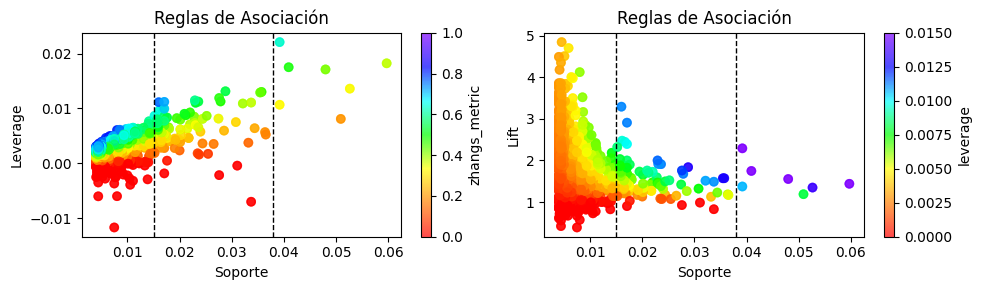

In [13]:
# Crea una figura con tres subparcelas una al lado de la otra
plt.figure(figsize=(10, 3))

# Llama a FGraficarporColores para cada conjunto de datos con un índice de subparcela específico
FGraficarporColores(rules, 'leverage', 'zhangs_metric' , 0 , 1, [0.015, 0.038], 'vertical', 121)
FGraficarporColores(rules, 'lift', 'leverage' , 0 , 0.015, [0.015, 0.038], 'vertical', 122)

plt.tight_layout()
plt.show()

Analizando la primera gráfica, se observa que para valores muy pequeños del soporte existen reglas muy buenas y muy malas en valoración de la zhangs_metric. Nuestro interés principal aquí es disminuir en la mayoría de lo posible los valores negativos, aunque se puedan perder algunos positivos. De esta forma, se tiene que un soporte de 0.015 reduciría considerablemente el número de malas reglas y conservaría un buen número de reglas decentes. En cambio, si se aumenta aún más el soporte, se tiene que a partir de 0.038 ya no habría malas reglas y se conservarían reglas de un nivel intermedio.

Por otro lado, la gráfica de la derecha nos brinda una estructura diferente. La gran mayoría de las reglas con un soporte pequeño son muy malas o intermedio-malas, mientras que cuando el soporte avanza, aumenta la cantidad de reglas buenas acorde al leverage. De esta forma, se obtiene que a partir del valor de 0.015 empiezan a aparecer reglas buenas (color azul) aunque se conserven algunas malas, mientras que a partir de 0.038 aparecen reglas muy buenas y ya no hay presencia de malas reglas.

De esta forma, se obtiene a través de ambas gráficas de manera aproximada que los valores ideales para probar soportes serían 0.015 y 0.038. A continuación, se crean los itemsets y reglas acorde a estos soportes.






In [14]:
low_frequent_itemsets = apriori(df, min_support=0.004, use_colnames=True)
moderate_frequent_itemsets = apriori(df, min_support=0.015, use_colnames=True)
high_frequent_itemsets = apriori(df, min_support=0.038, use_colnames=True)

low_rules = association_rules(low_frequent_itemsets, metric="support", min_threshold=0.004)
moderate_rules = association_rules(moderate_frequent_itemsets, metric="support", min_threshold=0.015)
high_rules = association_rules(high_frequent_itemsets, metric="support", min_threshold=0.038)

Para evaluar cómo el soporte influye en las reglas de asociación, se procederá a calcular y mostrar la cantidad de itemsets y reglas generadas para cada uno de los niveles de soporte seleccionados.

In [15]:
print('Número low_frequent_itemsets:', len(low_frequent_itemsets))
print('Número moderate_frequent_itemsets:', len(moderate_frequent_itemsets))
print('Número high_frequent_itemsets:', len(high_frequent_itemsets))

print('\nNúmero low_rules:', len(low_rules))
print('Número moderate_rules:', len(moderate_rules))
print('Número high_rules:', len(high_rules))

Número low_frequent_itemsets: 959
Número moderate_frequent_itemsets: 153
Número high_frequent_itemsets: 37

Número low_rules: 2822
Número moderate_rules: 194
Número high_rules: 14


Como era de esperar, a menor soporte hay una mayor cantidad de itemsets y reglas que lo cumplen. De esta forma, se obtiene que con un 0.004 de soporte existen 2822 reglas, número el cual, teniendo en cuenta que se tienen 7501 transacciones, es demasiado elevado, por lo que no será un valor del soporte adecuado. Por otro lado, un valor de 0.015 posee 194 reglas, lo cual puede ser un valor acorde para un correcto análisis. En contraste totalmente opuesto, se tiene que con 0.038 hay solo 14 reglas; estas 14 reglas serán probablemente más fuertes y con una gran probabilidad de ser tenidas en cuenta, pero sería adecuado buscar obtener un número mayor.

Para determinar las reglas finales se tendrán en cuenta los valores de las distintas métricas además de los valores de soporte de 0.015 y 0.038.

## **Metricas**



1.   Confianza:
Esta métrica indica la probabilidad de que la regla X→Y sea cierta. Se define como la proporción de transacciones que contienen tanto X como Y,respecto al número de transacciones que contienen X.

Una confianza de 0.6 significa que en el 60% de las veces que X ocurre, Y también ocurre, lo cual se considera muy bueno debido a una amplia representación de aparición. Una confianza de 0 indica que Y nunca ocurre cuando X ocurre, lo que obviamente es considerado como muy malo.

La fórmula de la confianza es:



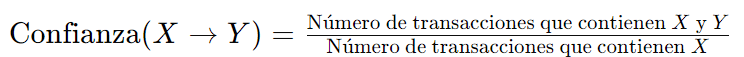

2.   Lift:
El lift mide el grado de asociación entre X e Y comparado con la independencia de ambos. Se
calcula como la razón entre la confianza de la regla y el soporte de Y.

Un lift de 3 significa que la presencia de X incrementa la probabilidad de Y en tres veces, lo cual es una relación muy buena para ambas variables. Mientrastanto, un lift de 1 o inferior indica que X e Y son independientes o negativamente relacionados (no se compran a la vez), y por eso se califica como muy malo.

La fórmula del lift es:

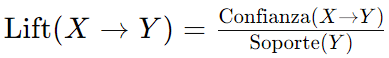



3.   Leverage:
El leverage representa la diferencia entre la frecuencia observada de X e Y apareciendo juntos y la frecuencia esperada si fueran independientes.

Un leverage de 0 significa que X e Y ocurren juntos exactamente tan a menudo como se esperaría por casualidad, valores superiores indican una relación beneficiosa para la regla, mientras que un valor negativo indicaria que no suelen aparecer juntos.

Su fórmula es:

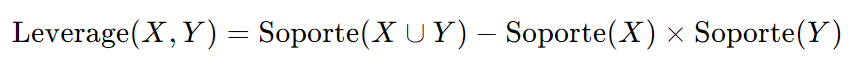


4.   Métrica de Zhang:
Esta métrica extiende el concepto del lift y se usa principalmente para evaluar la disasociación entre ítems, oscilando entre -1 y 1. Valores positivos señalan asociación, mientras que los negativos indican disasociación.

Un valor de 1 indica una asociación perfecta y es considerado muy bueno, mientras que un valor de 0 no muestra ninguna asociación y se considera muy malo.

La fórmula de la métrica de Zhang es:

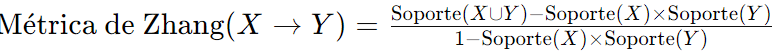

5.   Convicción:
Medida del grado de confianza en la inferencia de una regla. Se usa para cuantificar la certeza de que la consecuencia de una regla (Y) es realmente dependiente del antecedente (X).

Una convicción de 1 implica que la regla no tiene ningún poder de predicción más allá del azar, lo que la califica como muy mala. Un valor de 1.5 significa que la probabilidad de que Y no ocurra cuando se espera que ocurra dado X es 1.5 veces mayor de lo que sería si X e Y fueran independientes, lo que indica una regla fuerte.

La fórmula para calcular la confianza es:

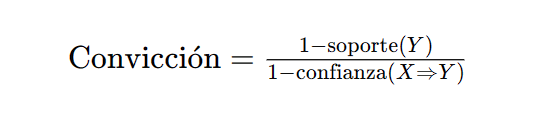


De manera similar a como ocurre con el soporte, se mostrarán 5 gráficas que muestren una relación significativa con la variable objetivo (métrica a analizar) para elegir sus valores. La métrica será el eje Y, por lo que el objetivo será encontrar una métrica en temperatura que divida dicho eje. Las relaciones encontradas son las siguientes:


*   Confidence ~ Conviction
*   Lift ~ Zhang's metric
*   Leverage ~ Lift
*   Conviction ~ Confidence
*   Zhang's metric ~ Lift





De esta forma, acorde a los valores positivos y negativos en la valoración de las reglas según cada métrica, se establecerán dos valores de corte para cada métrica. Uno en la zona fin-naranja principio-amarilla, la cual representa reglas que, aunque no del todo buenas, son aceptables hasta cierto punto; pueden ser no muy buenas en esta métrica pero buenas en otras. Mientras, el segundo valor de corte se determina a partir del color azul, seleccionando de esta manera las reglas mejor valoradas según esta métrica.






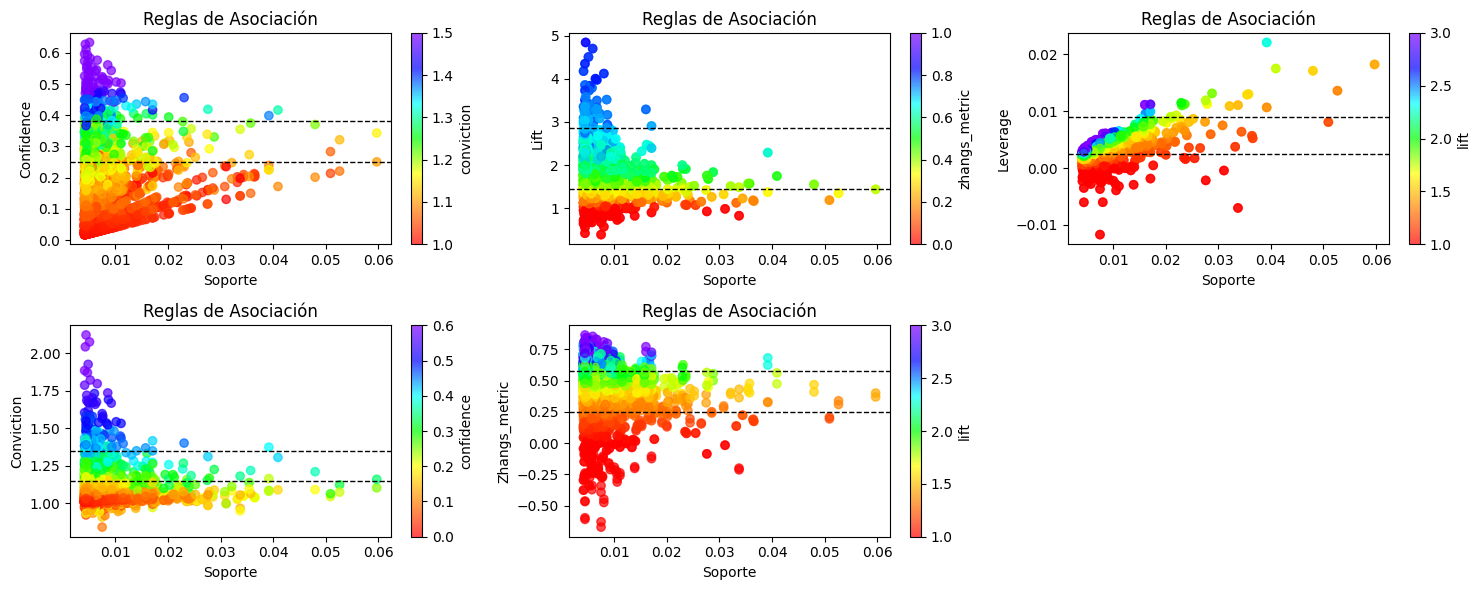

In [16]:
# Crea una figura con tres subparcelas una al lado de la otra
plt.figure(figsize=(15, 6))

FGraficarporColores(low_rules, 'confidence', 'conviction' , 1 , 1.5, [0.25, 0.38], 'horizontal', 231)
FGraficarporColores(low_rules, 'lift', 'zhangs_metric' , 0 , 1, [1.45, 2.85], 'horizontal', 232)
FGraficarporColores(low_rules, 'leverage', 'lift' , 1 , 3, [0.0025, 0.009], 'horizontal', 233)
FGraficarporColores(low_rules, 'conviction', 'confidence' , 0 , 0.6, [1.15, 1.35], 'horizontal', 234)
FGraficarporColores(low_rules, 'zhangs_metric', 'lift' , 1 , 3, [0.25, 0.58], 'horizontal', 235)

plt.tight_layout()
plt.show()

En las gráficas de Lift, Conviction y Zhang's metric, se observa que la diferenciación visual es bastante efectiva, y por ello se toman los valores [1.45, 2.85], [1.15, 1.35] y [0.25, 0.58] respectivamente.

Mientras tanto, para los valores de confidence están más esparcidos, de manera que el valor inferior (0.25) ha sido elegido como corte a partir del fin de los peores valores. En cambio, Leverage tiene un comportamiento muy distinto, agrupando valores buenos y malos en un mismo intervalo; de esta forma, se toma el valor bajo a partir de donde comienzan los mejores (0.0025) y el valor alto a partir de cuando terminan los peores (0.009).

## **Creación de reglas**

Una vez se tienen estos valores para las métricas se crean reglas acorde a estos valores tanto para las reglas moderadas (0.015) y las reglas altas (0.038).

De esta forma se aplica el proceso **association_rules** para cada una, obteniendo así 20 conjuntos diferentes de normas.

In [17]:
set_rules = []
itemset_classes = [moderate_frequent_itemsets, high_frequent_itemsets]
metrics = ['confidence','lift','leverage','conviction','zhangs_metric']
thresholds = [[0.25, 0.38],[1.45, 2.85],[0.0025, 0.009],[1.15, 1.35],[0.25, 0.58]]

for i in itemset_classes:
  for j in range(len(metrics)):
    for k in thresholds[j]:
      set_rules.append(association_rules(i, metric=metrics[j], min_threshold=k))

Se confirma a continuación que hay 20 conjuntos de reglas.

In [18]:
print(len(set_rules))

20


Cada conjunto de normas evalúa distintos aspectos de las métricas, identificando los puntos en los que las reglas son buenas o deficientes. No obstante, el propósito es generar un único conjunto de reglas. Para lograr esto, se asignará una puntuación a cada regla. Dicha puntuación se determinará de tal manera que se otorgue 1 punto por cada criterio de evaluación que la regla cumpla.

Con este sistema de puntuación, el valor máximo que una regla puede obtener es 20, lo cual indicaría un desempeño sobresaliente en todas las métricas evaluadas, (en un número elevado de veces cuando se cumple el antecedente se cumple el consecuente, los antecedentes y consecuentes están positivamente correlados, es decir, son complementarios)  mientras que un valor mínimo de 0 señalaría que la regla no cumple con ningún criterio de aceptabilidad establecido.

Las puntuaciones se calcularán teniendo en cuenta las reglas de moderación y se añadirán como un nuevo campo en el dataframe.

In [19]:
puntuaciones = []
count = 0

for i in moderate_rules.to_dict('records'):
  puntuacion = 0
  count += 1
  for j in set_rules:
    if i in j.to_dict('records'):
      puntuacion += 1
  puntuaciones.append(puntuacion)

moderate_rules['puntuacion'] = puntuaciones

Se crea una función para imprimir las reglas y sus puntuaciones ordenadas en función de la puntuación.

In [20]:
def imprimir_reglas(association_rules_result):
    for index, row in association_rules_result.iterrows():
        antecedentes = ", ".join(list(row['antecedents']))
        consecuentes = ", ".join(list(row['consequents']))
        puntuacion = row['puntuacion']
        print(f"{antecedentes} --> {consecuentes} {puntuacion}")
    print('\n')

En base a los valores de la puntuación, se van a clasificar las reglas en tres conjuntos.

Aquellas reglas con una puntuación superior a 10 serán consideradas como buenas reglas. Esto es debido a que, de media, estas reglas tienen una puntuación de 2 para cada una de las métricas. Esto se debe a que mínimamente la regla tendrá o un buen valor en los valores de las métricas o un buen valor de soporte o ambas de manera simultánea, de manera que estas reglas serán las más fiables.

Por otro lado, están las reglas con una puntuación superior o igual a 5. Estas reglas son aquellas consideradas aceptables debido a que al menos tienen de media 1 punto de valoración en cada métrica, siendo de esta forma decentes en todos los registros, de manera que no hay evidencia significativa como para rechazar la regla.

Por último, están las reglas con una puntuación inferior a 5. Estas reglas, aunque aceptables acorde a alguna métrica, tienen valores muy negativos (puntuación 0) en otras, por lo que se consideran reglas con alta probabilidad de ser incorrectas y decidimos no escogerlas.

Se crean los conjuntos de buenas reglas y reglas aceptables para su análisis.

In [21]:
top_rules = moderate_rules[moderate_rules['puntuacion'] >= 10]
top_rules = top_rules.sort_values(by='puntuacion', ascending=False)
decent_rules = moderate_rules[moderate_rules['puntuacion'] >= 5]
decent_rules = decent_rules.sort_values(by='puntuacion', ascending=False)

print('Top Rules:', len(top_rules))
imprimir_reglas(top_rules)

print('Decent Rules:', len(decent_rules))
imprimir_reglas(decent_rules)

Top Rules: 5
ground beef --> spaghetti 18
ground beef --> mineral water 14
spaghetti --> ground beef 12
milk --> mineral water 12
spaghetti --> mineral water 10


Decent Rules: 52
ground beef --> spaghetti 18
ground beef --> mineral water 14
milk --> mineral water 12
spaghetti --> ground beef 12
spaghetti --> mineral water 10
mineral water, ground beef --> spaghetti 9
herb & pepper --> ground beef 8
chocolate --> mineral water 8
mineral water, spaghetti --> ground beef 8
mineral water --> spaghetti 8
soup --> mineral water 8
mineral water --> milk 8
mineral water --> ground beef 8
olive oil --> mineral water 7
milk, spaghetti --> mineral water 7
burgers --> eggs 6
soup --> milk 6
olive oil --> spaghetti 6
chocolate --> spaghetti 6
spaghetti --> chocolate 6
cooking oil --> mineral water 6
tomatoes --> frozen vegetables 6
salmon --> mineral water 6
pancakes --> mineral water 6
chocolate, spaghetti --> mineral water 6
mineral water --> chocolate 6
tomatoes --> spaghetti 6
chicken --> mine

Los resultados indican que hay 5 reglas consideradas buenas, mientras que existe un total de 52 reglas catalogadas como decentes, de las cuales 47 son puramente decentes.

A continuación, se analizarán ambos grupos por separado. Para ello, se utilizarán gráficos de tarta para representar los antecedentes y los consecuentes de manera visual y clara.

In [22]:
def GTarta(reglas, lista_elementos, objetivo, num_elementos_mostrar=None, subplot_index=None, nombre=None):
    c = []

    for i in lista_elementos:
        cantidad = len(reglas[reglas[objetivo].apply(lambda x: i in str(x))])

        # Resta la cantidad de 'herb & pepper' si 'pepper' está presente en el nombre del elemento
        if i == 'pepper':
            cantidad -= len(reglas[reglas[objetivo].apply(lambda x: 'herb & pepper' in str(x))])

        if i == 'oil':
            cantidad -= len(reglas[reglas[objetivo].apply(lambda x: 'olive oil' in str(x))])
            cantidad -= len(reglas[reglas[objetivo].apply(lambda x: 'cooking oil' in str(x))])

        c.append(cantidad)

    # Filtrar elementos y cantidades
    elementos_con_cantidad = [(elemento, cantidad) for elemento, cantidad in zip(lista_elementos, c) if cantidad > 0]
    elementos_con_cantidad.sort(key=lambda x: x[1], reverse=True)

    if num_elementos_mostrar is not None and num_elementos_mostrar < len(elementos_con_cantidad):
        elementos_a_mostrar = elementos_con_cantidad[:num_elementos_mostrar]
        otros_elementos = elementos_con_cantidad[num_elementos_mostrar:]
        total_otros = sum(cantidad for _, cantidad in otros_elementos)
        elementos_a_mostrar.append(('Otros', total_otros))
    else:
        elementos_a_mostrar = elementos_con_cantidad

    elementos_filtrados = [elemento for elemento, _ in elementos_a_mostrar]
    c_filtrado = [cantidad for _, cantidad in elementos_a_mostrar]

    # Calcula el total de elementos
    total_elementos = sum(c_filtrado)

    # Calcula el porcentaje de cada elemento
    porcentajes = [(cantidad / total_elementos) * 100 for cantidad in c_filtrado]

    # Si subplot_index está presente, crea el subplot
    if subplot_index is not None:
        plt.subplot(subplot_index)

    # Crea el gráfico de tarta
    plt.pie(porcentajes, labels=elementos_filtrados, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f'{objetivo}')

    # Si antecesor está presente, establece el título con el antecesor
    if nombre:
        plt.title(f'{objetivo} {nombre}')

    # Si subplot_index está presente, ajusta el layout
    if subplot_index is not None:
        plt.tight_layout()

## **Conclusiones**

### **Buenas reglas**

Mostramos a continuación las reglas que son buenas.

In [23]:
imprimir_reglas(top_rules)

ground beef --> spaghetti 18
ground beef --> mineral water 14
spaghetti --> ground beef 12
milk --> mineral water 12
spaghetti --> mineral water 10




Las conclusiones extraídas de estas cinco reglas son directas y significativas:

La regla más destacada indica que si un cliente compra carne picada (ground beef), entonces es muy probable que también compre spaghetti. Esta regla, con una puntuación de 18/20, se clasifica como excelente, evidenciando una alta frecuencia de ocurrencia y un desempeño sólido en todas las métricas, lo que la convierte en completamente confiable. Además, existe una relación inversa: si se compran spaghetti, hay probabilidades de que se compre carne picada, aunque con una puntuación de 12. Esto refleja una fuerte asociación entre la carne picada y los spaghetti, posiblemente por platos populares como el spaghetti a la boloñesa.

Las otras tres reglas destacan al agua (mineral water) como consecuente, con antecedentes como la carne picada, la leche (milk) y los spaghetti. Esto sugiere que el agua es un producto comúnmente adquirido, sin importar otros artículos comprados, lo que podría indicar su popularidad general o situaciones específicas, como la ubicación en una zona sin acceso a agua potable.

### **Reglas decentes**

El conjunto de reglas decentes es más amplio para el análisis que las buenas reglas, y además, este conjunto incluye también a los 5 elementos de esta, por lo que las conclusiones pueden ser más completas.

Al ser un número de reglas demasiado amplio se emplea la representación de los antecedentes y consecuentes a partir de los diagramas de tarta.

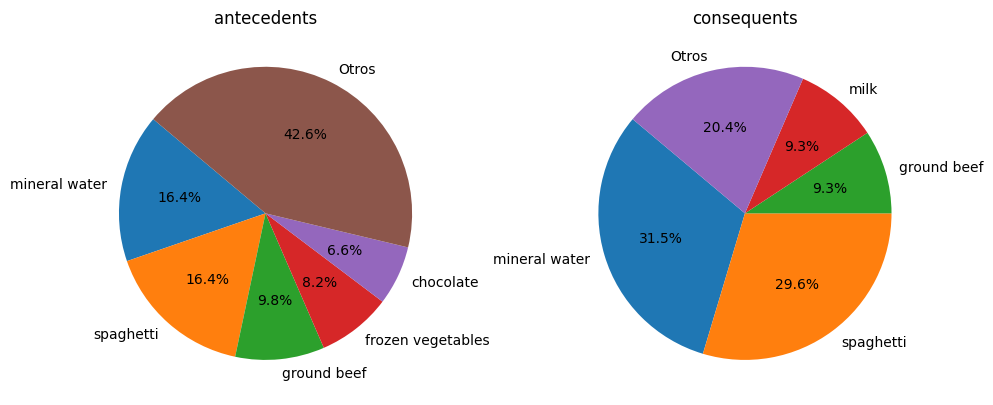

In [24]:
plt.figure(figsize=(10, 8))

GTarta(decent_rules, lista_elementos, 'antecedents' , 5, 221)
GTarta(decent_rules, lista_elementos, 'consequents' , 4, 222)

plt.tight_layout()
plt.show()

En la gráfica de antecedentes, se observa una distribución más equilibrada, con una variedad de elementos que funcionan como antecedentes. No obstante, es notable que los spaghetti y el agua mineral presentan una mayor frecuencia en comparación con el resto.

Por otro lado, la situación con los consecuentes no es tan equilibrada; el agua y los spaghetti juntos constituyen más del 60% de los consecuentes, lo que los hace muy recurrentes en numerosos registros.

A partir de estas gráficas, se concluye que no solo los spaghetti y el agua son comunes como consecuentes. Considerando que por la forma de las reglas un elemento no puede ser consecuente y antecedente a la vez, y reconociendo que el agua y los spaghetti son los elementos que más se repiten tanto en antecedentes como en consecuentes, se procederá a graficar y analizar específicamente los antecedentes y consecuentes asociados a cada uno de estos elementos.

Continuamos con el análisis enfocándonos primero en los antecedentes.

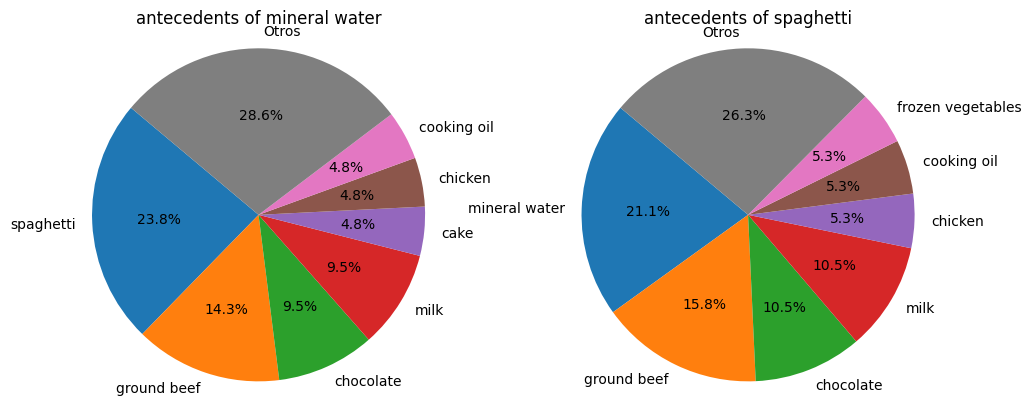

In [25]:
plt.figure(figsize=(10, 8))

element = 'mineral water'
rules_not_containing_element = decent_rules[decent_rules['consequents'].apply(lambda x: element in str(x))]
GTarta(rules_not_containing_element, lista_elementos, 'antecedents' , 7, 221,'of mineral water')

element = 'spaghetti'
rules_not_containing_element = decent_rules[decent_rules['consequents'].apply(lambda x: element in str(x))]
GTarta(rules_not_containing_element, lista_elementos, 'antecedents' , 7, 222,'of spaghetti')

plt.tight_layout()
plt.show()

Las gráficas proporcionan la frecuencia con la que un producto aparece como antecedente de agua o spaghetti. El incremento en el número de reglas y su porcentaje correspondiente puede deberse a dos factores:



1.   El mismo antecedente se asocia con diferentes conjuntos de productos consecuentes que contienen el artículo en cuestión.
2.   El antecedente clave está incluido en diversos conjuntos de antecedentes relacionados con el producto.

Por lo tanto, un porcentaje más alto indica una relación de compra más fuerte entre ambos productos, ya que la presencia de conjuntos de ítems más grandes se atribuye a la robustez de la regla subyacente, en este caso, la relación de compra entre los productos en cuestión.

De estas gráficas se desprende que los antecedentes para ambos productos son muy parecidos. El dato más destacable es que el agua y los spaghetti a menudo son antecedentes el uno del otro, lo que sugiere que son productos comúnmente vendidos juntos. Esta conclusión se refuerza al observar que los siguientes productos que usualmente los preceden son los mismos (carne picada, leche, chocolate y aceite de oliva), indicando que tienden a comprarse juntos frecuentemente.

Ahora, pasaremos a analizar los consecuentes asociados a ambos productos.

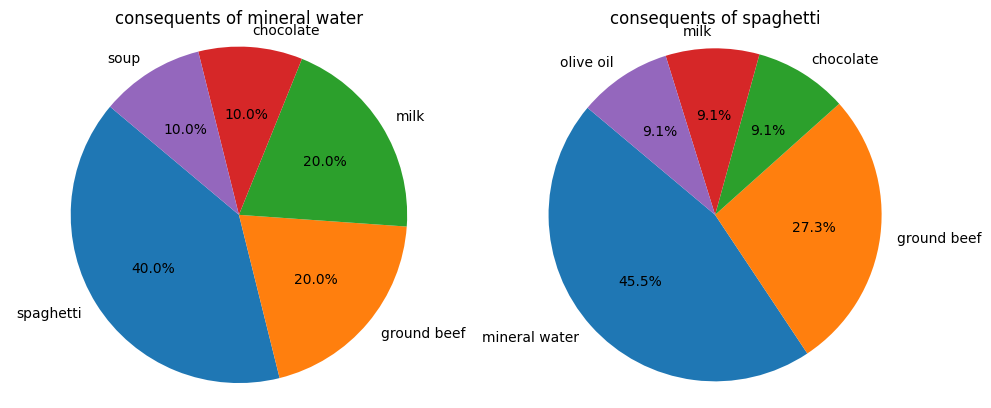

In [26]:
plt.figure(figsize=(10, 8))

element = 'mineral water'
rules_not_containing_element = decent_rules[decent_rules['antecedents'].apply(lambda x: element in str(x))]
GTarta(rules_not_containing_element, lista_elementos, 'consequents' , 7, 221,'of mineral water')

element = 'spaghetti'
rules_not_containing_element = decent_rules[decent_rules['antecedents'].apply(lambda x: element in str(x))]
GTarta(rules_not_containing_element, lista_elementos, 'consequents' , 6, 222,'of spaghetti')

plt.tight_layout()
plt.show()

Conforme a las conclusiones sobre los antecedentes, el agua y los spaghettis frecuentemente se encuentran como consecuentes mutuos. Del mismo modo, la carne picada (ground beef), el chocolate y la leche (milk) también figuran como consecuentes comunes, destacando que la leche tiene una relación más estrecha con el agua que con los spaghettis.

La comparativa entre los antecedentes y consecuentes de estos productos subraya su popularidad. Tanto el agua como los spaghettis cuentan con 5 consecuentes principales, que son los artículos más propensos a ser adquiridos a continuación, mientras que en cuanto a sus antecedentes, solo 7 componen el 75%, y el restante 25% se compone de otros múltiples productos. Esto sugiere que los antecedentes de ambos productos son bastante variados y que independientemente de lo que se compre inicialmente, hay una alta probabilidad de que luego se adquiera agua o spaghettis.

Para el análisis del resto de las reglas relevantes, se analizarán únicamente aquellas reglas que no incluyan ni agua ni spaghettis.

In [27]:
elemento = 'mineral water'
no_water_rules = decent_rules[~decent_rules['antecedents'].apply(lambda x: elemento in str(x))]
no_water_rules = no_water_rules[~no_water_rules['consequents'].apply(lambda x: elemento in str(x))]

elemento = 'spaghetti'
no_spaghetti_rules = no_water_rules[~no_water_rules['antecedents'].apply(lambda x: elemento in str(x))]
no_spaghetti_rules = no_spaghetti_rules[~no_spaghetti_rules['consequents'].apply(lambda x: elemento in str(x))]

imprimir_reglas(no_spaghetti_rules)

herb & pepper --> ground beef 8
burgers --> eggs 6
soup --> milk 6
tomatoes --> frozen vegetables 6
shrimp --> frozen vegetables 6
ground beef --> herb & pepper 6
frozen vegetables --> tomatoes 5
olive oil --> milk 5
turkey --> eggs 5
frozen vegetables --> milk 5
frozen vegetables --> shrimp 5




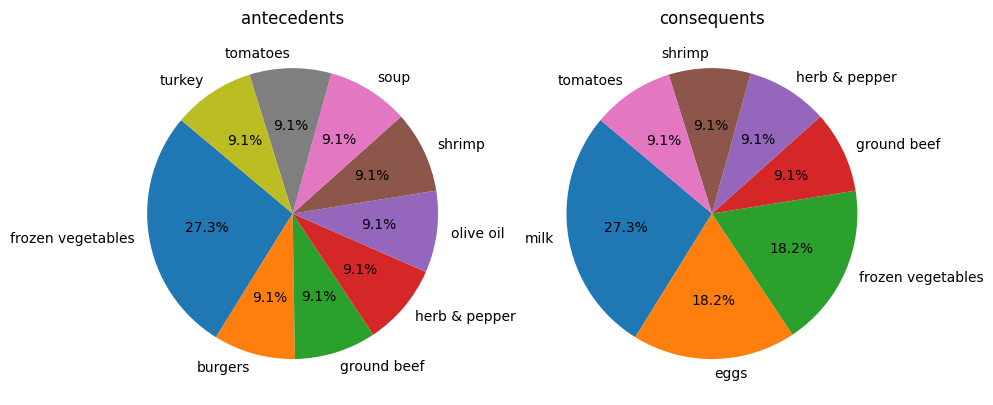

In [28]:
plt.figure(figsize=(10, 8))

GTarta(no_spaghetti_rules, lista_elementos, 'antecedents' , 10, 221)
GTarta(no_spaghetti_rules, lista_elementos, 'consequents' , 10, 222)

plt.tight_layout()
plt.show()

De estas figuras se sonsaca que en este subconjunto de reglas hay mucho mas equilibrio. Como antecedentes el unico fuera del equilibrio es frozen vegetables ocupando un 25% de las reglas. Como consecuentes hay algo mas de desiquilibrio con 3 productos pasando el 50%, siendo leche (milk), huevos (eggs) y frozen vegetables los mas populares.

De estos datos se sonsaca que, tras la gran popularidad del agua (water) y los spaghetti son los frozen vegetables el siguiente producto mas popular, teniendo una gran influencia tanto como antecedente como consecuente, reforzando asi su importancia.

Tambien se tiene que los productos como la leche (milk) y los huevos (eggs) son mas populares como consecuentes sin ser antecedentes, lo cual puede indicar que sean productos usualmente mas vendidos como acompañantes y secundarios

### **Medidas a tomar**

A partir de las normas obtenidas, se deducen las siguientes **conclusiones y medidas** a tomar:

* Medidas a partir de la **popularidad** de los productos:

  * El **agua** es el producto más común. Esto puede deberse a que es un recurso de vital importancia y es consumido por todas las personas, por lo que su **gran popularidad** es **esperada**. A pesar de ello, sería recomendable tener una gran reserva de agua mineral.

   Medidas que se podrían implementar: **Programas de Fidelización y Recompensas** que recompense a los clientes por compras recurrentes o por compras específicas de productos relacionados. Por ejemplo, podrían ofrecer puntos de recompensa por cada compra de espaguetis o agua, que los clientes puedan canjear por descuentos en futuras compras o por productos gratuitos.

  * Los **espaguetis** son el segundo producto más común después del agua. Aunque su popularidad es ligeramente inferior, resulta mucho más sorprendente. Generalmente, la venta de espaguetis no suele ser tan popular, lo que podría indicar que las ventas se están produciendo en culturas donde la pasta es popular, como la italiana. Más allá de la posible influencia cultural desconocida, el reconocimiento de los espaguetis como un producto muy popular aporta información de gran valor. Debido a su **popularidad más amplia de lo esperado**, sería recomendable considerar reservas amplias del producto.

  * Los **vegetales congelados** son el tercer producto más popular. Su popularidad es mucho más baja que la del agua y los espaguetis, y además, **no aporta gran información**. Es conocido que los vegetales se **combinan con una gran cantidad de platos** como acompañantes, por lo que era de esperar tal popularidad.


* Medidas a partir de **relaciones inesperadas**:

  * La **leche** es consecuencia de varios productos en una relación extraña e inesperada. Sus antecedentes son la **sopa, los vegetales congelados y el aceite de oliva**, elementos que **no suelen combinarse con la leche** en platos o recetas. Esto es lo que hace que estas **tres reglas aporten información**, por lo que sería recomendable ubicar la leche en lugares cercanos a donde se encuentren estas variedades de productos. Asimismo, el negocio podría crear paquetes o ofertas especiales que incluyan estos productos en conjunto con la leche. Esto podría aumentar las ventas al aprovechar las asociaciones identificadas entre estos productos en las compras de los clientes.

  * La compra de **pavo** conlleva a menudo a la compra de **huevos**. El pavo con huevo **no es un plato común** en ninguna cultura, y no existen recetas que incluyan ambos productos. De esta manera, esta relación se plantea como llamativa, **aportando un valor adicional** a la información más allá de lo esperado por los factores lógicos.

Además, también tenemos **reglas que son esperadas** y que no nos aportan información adicional, como la compra simultánea de **especias y carne picada**, que suelen estar juntas en gran cantidad de recetas. O que la compra de **hamburguesas conlleva huevos**, ya que la hamburguesa con huevo es una comida bastante popular.

# **Ejercicio 2**

La **base de datos** de este ejercicio consiste en registros que  contienen información detallada sobre las transacciones de compra realizadas por distintos clientes. Este archivo incluye campos clave como `StockCode` y `Description` para identificar productos, `CustomerID` para identificar a los clientes, e `InvoiceDate` para determinar el momento de cada transacción. Para poder sacar conclusiones de negocio sobre esta información, los patrones secuenciales jugarán un papel esencial.

Los **patrones secuenciales** consisten en la extracción de patrones frecuentes que nos ayudan a entender las secuencias o series de eventos que ocurren en el tiempo. En el contexto de este conjunto de datos, estos patrones pueden revelar, por ejemplo, si los clientes tienden a comprar ciertos productos antes o después de adquirir otros. Al analizar estos patrones, podemos identificar tendencias en cómo los clientes adquieren productos a lo largo del tiempo, lo cual es imprescindible para tomar decisiones estratégicas de negocio. Por ejemplo, podemos descubrir que ciertos productos tienden a ser comprados juntos o en un orden específico.

La aplicación de patrones secuenciales en este caso es útil al ayudar con la **optimización de inventario y marketing**, ya que al entender en qué orden se compran los productos, se pueden hacer predicciones más precisas sobre la demanda futura, gestionar mejor el inventario y diseñar estrategias de marketing más efectivas. Además, en base a las secuencias de compra, se pueden hacer **recomendaciones personalizadas** a los clientes, potencialmente aumentando así las ventas.

Para llevar a cabo este análisis, se aplicará el algoritmo **Generalized Sequential Patterns (GSP)**,  siendo este capaz de identificar patrones secuenciales frecuentes dentro de un conjunto de datos dado, basándose en un umbral de **soporte**, el cual es un  parámetro que determina qué tan frecuentemente debe aparecer una secuencia en el conjunto de datos para ser considerada significativa.

Una vez identificados y analizados los patrones secuenciales, se podrá extraer **conclusiones** valiosas para el negocio que podrían ayudar a mejorar la toma de decisiones.


## Cargar base

In [29]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


### **Cargamos la base de datos**

Para cargar correctamente el dataset y asignar los nombres adecuados a las columnas, se **omite** la primera fila en el momento de cargar la base de datos, ya que los encabezados no están cuadrados de manera correcta. Posteriormente, se **agrega** una nueva fila al inicio del dataset que especifica los nombres de cada columna.


In [31]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

nombres_columnas = ['InvoiceNo', 'StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country']

df = pd.read_excel('/content/Online Retail.xlsx', header=None, skiprows=1)

# Asignar los nuevos nombres de columna al DataFrame
df.columns = nombres_columnas

In [32]:
import pandas as pd
import warnings

# Ignorar el SettingWithCopyWarning
warnings.filterwarnings('ignore', category=pd.core.generic.SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

**Copia de seguridad**

In [33]:
df_filtrado = df.copy()

**Descripción de los datos**


* **InvoiceNo**: es el número de identificación de la compra. Por lo tanto, se puede repetir si se han comprado varios productos en una misma compra. Puede ser útil para agrupar productos comprados en la misma transacción.
* **StockCode**: es el identificador único para cada producto
* **Description**: es una descripción del producto comprado
* **Quantity**: es la cantidad que se ha comprado de un mismo producto en la misma compra
* **InvoiceDate**: proporciona la fecha y hora en la que se ha realizado la compra,crucial para entender la secuencia temporal de las compras.
* **UnitPrice**: el precio unitario de cada producto
* **CustomerID**: identificador único para cliente. Se puede repetir en distintos momentos si realizan varias compras por separado, así como varias veces en un mismo InvoiceDate si ha comprado varios productos
* **Country**: país donde se ha comprado el producto, que podría proporcionar información adicional sobre la distribución geográfica de las compras.

In [34]:
df_filtrado.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


**Mostramos la descripción de las variables numéricas**

In [35]:
print(df_filtrado.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  541909.000000
mean        9.552250       4.611114   15287.518434
std       218.081158      96.759853    1484.746041
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   14367.000000
50%         3.000000       2.080000   15287.000000
75%        10.000000       4.130000   16255.000000
max     80995.000000   38970.000000   18287.000000


Se observa un **resumen estadístico de las columnas numéricas mediante el método `describe()`**. En el caso de este DataFrame `df_filtrado`, tenemos tres columnas numéricas: `Quantity`, `UnitPrice` y `CustomerID`. Conlcusiones que se pueden sacar de los datos:

- **mean**: La media de `Quantity` es aproximadamente 9.55, lo que indica que en promedio se compran casi 10 unidades por transacción. La media del `UnitPrice` es alrededor de 4.61, sugiriendo que el precio unitario promedio de los productos es de £4.61.

- **std** (desviación estándar): Una desviación estándar de 218.08 en `Quantity` y de 96.76 en `UnitPrice` muestra una variabilidad bastante alta en ambas columnas. Esto podría indicar que hay transacciones con una cantidad o un precio muy diferente al promedio.

- **min**: La variable `Quantity` tiene un valor mínimo negativo de -80995. En un contexto de ventas, esta situación es atípica. Esto indica **cancelaciones** de productos, que se pueden observar en el **InvoiceNo** cuando el valor numérico empieza con la **letra C**. Por otro lado, `UnitPrice` tiene un valor mínimo de -11062.06, que se ve reflejado cuando `InvoiceNo` comienza con la **letra A**, indicando una **deuda** mala.

- **25%** (primer cuartil): El 25% de las transacciones incluyen una `Quantity` de al menos 1 y un `UnitPrice` de al menos 1.25, lo que podría considerarse como compras de baja cantidad y bajo precio.

- **75%** (tercer cuartil): El 75% de las transacciones tienen una `Quantity` de 10 o menor y un `UnitPrice` de 4.13 o menor. Esto significa que la mayoría de las compras no son de grandes cantidades o de artículos muy caros, comprobando así que la tienda analizada es un **bazar**.

- **max**: Los valores máximos son extraordinariamente altos, con una `Quantity` de 80995 y un `UnitPrice` de 38970. Esto podría representar pedidos que se venden en grandes cantidades o artículos de precio muy alto, aunque estos valores podrían ser también errores o valores atípicos.

***Nota***: *mirar anexo 2 para observación de las letras A y C*

# **Limpiar Base**

## **Eliminar datos analíticos (outliers)**

### **Rango Intercuartilico**

La función `rangoIntercuartilico_borrar` es una herramienta estadística diseñada para **identificar outliers** dentro de un conjunto de datos basándose en el **método del rango intercuartílico (IQR)**.

Para realizar esta tarea, la función emplea el rango intercuartílico (IQR), que es la diferencia entre el tercer y el primer cuartil (Q3 y Q1), proporcionando una medida de la dispersión central de los datos. Estos cuartiles son puntos que dividen el conjunto de datos ordenados en cuatro partes iguales. Q1 es el valor por debajo del cual se encuentra el 25% de los datos, y Q3 es el valor por debajo del cual se encuentra el 75% de los datos.

La función establece límites para identificar los outliers basados en el IQR. El límite superior es Q3 más 1.5 veces el IQR, y el límite inferior es Q1 menos 1.5 veces el IQR. Cualquier dato que se encuentre **más allá de estos límites** se considera un **outlier**.

In [36]:
variable = ['Quantity','UnitPrice']

In [37]:
def rangoIntercuartilico_borrar(var,dfMini):
  # Calcular Q1, Q3 y IQR
  Q1 = dfMini.quantile(0.25)
  Q3 = dfMini.quantile(0.75)
  IQR = Q3 - Q1

  # Definir los límites para los outliers
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  print(f'\n{var}: límite inferior es {limite_inferior} y cuyo límite superior es {limite_superior}')
  return limite_inferior, limite_superior

**Eliminar limites**

Para contar los outliers, la función evalúa cada observación de la variable en cuestión y **verifica si cae fuera de los límites** establecidos. Si una observación es menor que el límite inferior o mayor que el límite superior, se cuenta como un outlier.

Una vez identificados, estos valores atípicos se **eliminan** del conjunto de datos, asegurando que los análisis subsecuentes no estén influenciados por estas anomalías. Esta limpieza es fundamental para obtener insights fiables y para tomar decisiones basadas en datos que representan con precisión la tendencia central del conjunto de datos. Además, se ya que son datos poco frecuentes, que para el GSP podrían producir dificultades como relentizarlo o aumentar el número de cleintes (secuencias) y repercutir en el soporte (medida que se ha explciado en el ejericio anterior y que se explicará en la implementación del GSP).

**Eliminar cantidades y precios nulos**

Aunque la función devuelve un límite inferior con valor -3, por las explicaciones anteriores, se entiende que no nos interesa analizar los productos con cantidades nulas, indicando que no se ha comprado nada o que son descuentos/promociones. Esto no nos aportará ningún valor en la futuras reglas, pues nos interesa no solo mostrar los comportamientos de los clientes individualmente, sino que estas reglas sean efectivas. Es decir, que tengan un valor económico que les sea rentable, así como una cantidad mínima de un producto.

In [38]:
for i in variable:
  li,ls = rangoIntercuartilico_borrar(i,df_filtrado[i])
  outliers_count = df_filtrado[(df_filtrado[i] < 0) | (df_filtrado[i] > ls)].shape[0]
  print(f'Hay {outliers_count} outliers para la variable {i}')
  df_filtrado = df_filtrado[df_filtrado[i] > 0]
  df_filtrado = df_filtrado[df_filtrado[i] <= ls]


Quantity: límite inferior es -12.5 y cuyo límite superior es 23.5
Hay 67259 outliers para la variable Quantity

UnitPrice: límite inferior es -3.1000000000000005 y cuyo límite superior es 8.5
Hay 31077 outliers para la variable UnitPrice


**Describimos variables SIN outliers**

Al eliminar los outliers, también se eliminan las descripciones sin información (NaN)

In [39]:
print(df_filtrado.describe())

            Quantity      UnitPrice     CustomerID
count  442666.000000  442666.000000  442666.000000
mean        4.904070       2.784289   15334.179359
std         4.495069       2.036175    1463.474643
min         1.000000       0.001000   12347.000000
25%         1.000000       1.250000   14489.000000
50%         3.000000       2.100000   15287.000000
75%         8.000000       3.750000   16326.000000
max        23.000000       8.500000   18287.000000


**Resumen estadístico de los datos sin outliers**

Después de quitar los valores atípicos de las variables `Quantity` y `UnitPrice`, el resumen estadístico del conjunto de datos muestra cambios significativos que indican una distribución de los datos más homogénea y representativa del comportamiento general de las transacciones.

Para `Quantity`:
- El **mínimo** aumenta a 1, lo que significa que ya no hay cantidades negativas, las cuales no tendrían sentido en el contexto de una cantidad de artículos comprados.
- La **media** disminuye ligeramente de 9.552250 a 4.904070, lo que indica que los valores extremadamente altos que fueron eliminados estaban inflando la media anterior.
- La **desviación estándar** disminuye drásticamente de 218.081158 a 4.495069, sugiriendo que la variabilidad de la cantidad de artículos comprados por transacción es ahora mucho más baja y más consistente.
- El **máximo** disminuye significativamente de 80995 a 23, lo cual elimina el efecto de valores extremadamente altos que podrían ser errores de entrada o compras inusuales que no son típicas del comportamiento general del cliente.

Para `UnitPrice`:
- La **media** disminuye de 4.611114 a 2.784289, lo que indica que al eliminar outliers con precios unitarios muy altos, el precio promedio se ha reducido y es probablemente un reflejo más exacto del costo típico de los artículos.
- La **desviación estándar** disminuye de 96.759853 a 2.036175, indicando que la variación en el precio unitario de los artículos es ahora mucho menos dispersa.
- El **máximo** se reduce considerablemente de 38970.000000 a 8.500000, eliminando valores que no son comunes en el rango de precios de los productos normales.

Estos cambios indican que al eliminar los outliers, se ha normalizado la distribución de ambas variables, lo que puede llevar a análisis más precisos y relevantes para la toma de decisiones. Con los outliers, los análisis podrían estar sesgados debido a estos valores extremos, pero sin ellos, los indicadores estadísticos son ahora más representativos del comportamiento de compra típico.

## **Eliminar StockeCode invalidos y tranformar productos**

La función `conformidadProducto` está diseñada para **depurar la columna `StockCode`** de un conjunto de datos, asegurando que todos los códigos de stock sean **uniformemente numéricos** y **eliminando aquellas filas que no cumplen con este criterio**, para así asegurar un formato consistente y legible para agilizar el GSP. Aquí está el proceso que sigue:

Primero, recibe una lista de valores únicos de `StockCode`, que luego itera individualmente. Para cada código, la función chequea si es numérico o contiene carácteres alfanuméricos. Si el código es completamente numérico o tiene carácteres no numéricos solo al final, estos últimos se eliminan. Si el código incluye carácteres no numéricos en otra posición que no sea la última, se asume que el código de stock es inválido para los propósitos del análisis y, por lo tanto, todas las filas con ese `StockCode` se eliminan del conjunto de datos.

Cada vez que se elimina un código de stock, se incrementa un **contador** para que al final del proceso, la función pueda devolver la **cantidad de "productos raros" que han sido borrados**, proporcionando así una idea clara de cuántas filas fueron afectadas por este proceso de limpieza.

En segunda instancia, se realizó una revisión detallada de los códigos de los productos y sus descripciones, se identificó que los productos que poseen carácteres alfabéticos al final representan **diferentes tipos del mismo artículo**, como podría ser el color o botellas de diferentes estilos (corazones, banderas)....
Para focalizar el análisis en el comportamiento general de las secuencias de productos, se propone eliminar la distinción de tipos en estos casos. Este enfoque permitirá una evaluación más global y precisa de los datos, facilitando la extracción de conclusiones más relevantes sobre los patrones de compra.

Además, se implementarán dos mejoras significativas. Primero, se convertirán todos los códigos de productos a formato entero (int), lo que optimizará considerablemente el proceso de Generación de Secuencias de Patrones (GSP). El manejo y comparación de datos enteros resulta mucho más eficiente que trabajar con cadenas de texto (strings), agilizando así el análisis. Segundo, al reducir la subdivisión de productos por tipo, se incrementará la frecuencia de aparición de algunos artículos. Esto, a su vez, permitirá que las subsecuencias presenten una mayor frecuencia y soporte, manteniendo constante el número de clientes o secuencias. Como resultado, se podrán derivar reglas más extensas, ofreciendo configuraciones más ricas para el estudio del comportamiento de compra.

De esta forma, se tiene como resultado un conjunto de datos más coherente, con códigos de stock estandarizados y libre de entradas que podrían complicar análisis futuros.

***Nota***: *mirar anexo de la evaluación de la conversión para comprobar que las letras en el stockcode significan tipos de un mismo producto.*

In [40]:
def conformidadProducto(df_filtrado, variables):
  i = 1

  for codigo in variables:
    codigoValidar = str(codigo)
    if codigoValidar[:-1].isdigit():
      if codigoValidar[-1:].isdigit():
        codigo2 = int(codigoValidar)
      else:
        codigo2 = int(codigoValidar[:-1])

      df_filtrado['StockCode'] = df_filtrado['StockCode'].replace(codigo, codigo2)

    else:
      df_filtrado = df_filtrado[~df_filtrado['StockCode'].str.contains(codigoValidar, na=False)]
      i = i + 1

  print(f'Se han elimando {i} productos raros')

  return df_filtrado

**Pasar los datos del código de producto a INT**

A continuación, se transforma la columna `StockCode` a un formato numérico uniforme. Este proceso se realiza con el fin de asegurar la consistencia y la facilidad de manipulación de los códigos de stock en análisis posteriores. Se convierten todos los valores de la columna `StockCode` a números, asignando un cero a cualquier valor que no pueda ser convertido debido a que contiene carácteres no numéricos u otros problemas. Por útlimo, se asegura que toda la columna es tratada como entera, eliminando cualquier decimal que pueda haber surgido en el proceso de conversión.

In [41]:
variables = df_filtrado['StockCode'].unique()

df_filtrado = conformidadProducto(df_filtrado, variables)

Se han elimando 12 productos raros


**Observación de datos**

La transformación del código de productos ha introducido una nueva columna en el conjunto de datos numéricos, facilitando el análisis y manejo de la información.

In [42]:
print(df_filtrado.describe())

           StockCode       Quantity      UnitPrice     CustomerID
count  441953.000000  441953.000000  441953.000000  441953.000000
mean    31557.338688       4.906644       2.783491   15334.302867
std     21516.295785       4.496041       2.035467    1463.471009
min     10002.000000       1.000000       0.060000   12347.000000
25%     21974.000000       1.000000       1.250000   14489.000000
50%     22639.000000       3.000000       2.100000   15287.000000
75%     23286.000000       8.000000       3.750000   16326.000000
max     90214.000000      23.000000       8.500000   18287.000000


## **Eliminar datos prácticos**

### **Eliminar productos repetidos en misma transacción**

En el análisis de patrones frecuentes en distintas secuencias, es crucial comprender que el orden de los elementos dentro de una misma transacción no afecta a su relevancia. Por lo tanto, la aparición única de un producto en una transacción se considera equivalente a múltiples apariciones del mismo elemento.

In [43]:
def eliminar_repetidos(df_filtrado):

  p = df_filtrado.drop_duplicates(subset=['CustomerID', 'InvoiceDate', 'StockCode'], keep='first')
  print(f'Se han eliminado {len(df_filtrado)-len(p)} productos repetidos en la misma fecha y cliente')

  return p

In [44]:
df_filtrado = eliminar_repetidos(df_filtrado)

Se han eliminado 21349 productos repetidos en la misma fecha y cliente


### **Evaluar Clientes**


La **función `eliminar_clientes`** tiene como objetivo refinar el conjunto de datos `df_filtrado` **eliminando clientes que alcancen una transacción o menos**. Esto permite concentrarse en secucencias con varias transacciones lo que nos facilitará crear mejores reglas.

La función opera de la siguiente manera:

- Identifica los identificadores únicos de los clientes en la columna especificada por `variable`.
- Itera sobre cada uno de estos identificadores de clientes, contabilizando el número total de transacciones que ha realizado cada cliente dentro del conjunto de datos.
- Si el total de transacciones (`totP`) de un cliente es menor o igual al umbral definido por 1, se considera que no cumple con el criterio de actividad mínima y se agrega su identificador a una lista de clientes para eliminar.

- Finalmente, filtra el conjunto de datos original para excluir a todos los clientes con baja actividad, y retorna este conjunto de datos depurado.



In [45]:
def eliminar_clientes(variable,df_filtrado):
  IDcliente = df_filtrado[variable].unique()

  i = 0
  eliminar = []
  for p in IDcliente:
      totP = df_filtrado[df_filtrado[variable] == p].shape[0]

      if totP <= 1: # borrar cliente con solo 1
        eliminar.append(p)
        i = i + 1

  df_filtrado = df_filtrado[~df_filtrado[variable].isin(eliminar)]

  print(f'Se han eliminado {i} clientes')

  return df_filtrado, i

### **Eliminar Productos con frecuencias bajas**

La función `eliminar_producto` elimina los productos con una frecuencia umbral inferior a la dada. Es decir, que los productos que se repitan poco los elimina. De esta forma, el algoritmo GSP pasa a ser mucho más eficiente, eliminanado en cierto modo su primera iteración.

La función realiza lo siguiente:

- Se genera una lista de todos los códigos de productos únicos presentes en el conjunto de datos.
- Se recorre esta lista para calcular cuántas veces se ha vendido cada producto.
- Si la cantidad de ventas de un producto es menor o igual al `tope` establecido.
- Se añade el código del producto a una lista de códigos a eliminar.
- Una vez identificados todos los productos con ventas bajas, se excluyen del conjunto de datos.

In [46]:
def eliminar_producto(variable,df_filtrado,tope):
  IDproducto = df_filtrado[variable].unique()

  i = 0
  eliminar = []
  for p in IDproducto:
      totP = df_filtrado[df_filtrado[variable] == p].shape[0]

      if totP <= tope:
        nomP = df_filtrado['Description'][df_filtrado[variable] == p].unique()
        if len(nomP) > 0:
            nomP = nomP[0]
        else:
            nomP = "Descripción no encontrada"

        eliminar.append(p)

        i = i + 1

  df_filtrado = df_filtrado[~df_filtrado[variable].isin(eliminar)]

  print(f'Se han eliminado {i} productos')

  return df_filtrado, i

### Bucle de eliminación

Las dos funciones recientes se centran en eliminar productos infrecuentes y clientes con una sola transacción para afinar el análisis de patrones de compra. Por ello, como una podría repercutir en la otra, se evaluarán en un mismo bucle para hacer uan limpieza más exhaustiva.

In [47]:
i,j = 5, 5
while ((i!=0) or (j!=0)): # cuando he eliminado ya todos los que no cumplen con el soporpte (i,j=0)
  df_filtrado, i = eliminar_clientes('CustomerID',df_filtrado)
  df_filtrado, j = eliminar_producto('StockCode',df_filtrado,29)

Se han eliminado 79 clientes
Se han eliminado 920 productos
Se han eliminado 3 clientes
Se han eliminado 0 productos
Se han eliminado 0 clientes
Se han eliminado 0 productos


**Observar datos**

Al comparar las estadísticas descriptivas del conjunto de datos `df_filtrado` antes y después de los cambios, es evidente que la función de eliminación de productos ha tenido un impacto notable:

- La **cantidad total** (`count`) de registros ha disminuido de 441953 a 409951, lo que indica que se han eliminado una pequeña cantidad de transacciones que involucraban productos con ventas menores o iguales a 29.

- La **media** (`mean`) de `Quantity` ha aumentado de aproximadamente 4.90 a 5.01. Esto sugiere que, en promedio, los productos que se han mantenido en el conjunto de datos se venden en similares aunque ligeramente mayores cantidades por transacción que los que fueron eliminados.

- La **desviación estándar** (`std`) de `Quantity` ha aumentado ligeramente, indicando que la dispersión en la cantidad de productos vendidos por transacción es mayor después de la eliminación.

- Los valores **mínimos** para `Quantity` y `UnitPrice` permanecen inalterados, mientras que los valores **máximos** tampoco han cambiado, lo que indica que los extremos de estas distribuciones no fueron afectados por la eliminación de productos.

In [48]:
print(df_filtrado.describe())

           StockCode       Quantity      UnitPrice     CustomerID
count  409951.000000  409951.000000  409951.000000  409951.000000
mean    30026.434574       5.009906       2.786164   15321.045271
std     19850.226454       4.529367       2.025620    1465.795244
min     10002.000000       1.000000       0.060000   12347.000000
25%     21936.000000       1.000000       1.250000   14456.000000
50%     22620.000000       3.000000       2.100000   15287.000000
75%     23213.000000       8.000000       3.750000   16283.000000
max     90214.000000      23.000000       8.500000   18287.000000


# Crear secuencias clientes

La siguiente función crea un vector detallado de las secuencias de compra de cada cliente, agrupando los productos comprados en cada transacción por fecha. Este vector refleja el patrón de compras de los clientes a lo largo del tiempo, identificando qué productos fueron adquiridos juntos (una transacción conformada por distintos elementos) y por quién (secuencia conformada por distintas transacciones).

In [49]:
def secuencias_clientes(df_filtrado):
    IDcliente = df_filtrado['CustomerID'].unique()
    total = []

    for cliente_id in IDcliente:
        df_cliente = df_filtrado[df_filtrado['CustomerID'] == cliente_id]
        IDfecha = df_cliente['InvoiceDate'].unique()

        secuencias_cliente = []

        for fecha in IDfecha:
            vector_tiempo = df_cliente['StockCode'][df_cliente['InvoiceDate'] == fecha].tolist()
            secuencias_cliente.append(vector_tiempo)

        total.append(secuencias_cliente)

    return total

In [50]:
vectorGSP = secuencias_clientes(df_filtrado)

### Confirmación de vectores

Confirmamos para el primer cliente (17850) que el vector guarda correctamente las transacciones y los elementos de cada una.

In [51]:
print(vectorGSP[0])

[[85123, 71053, 84406, 84029, 22752, 21730], [22633, 22632], [22632, 22633], [85123, 71053, 84406, 20679, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494, 84029, 22752, 21730], [85123, 71053, 84406, 20679, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494, 84029, 22752, 21730], [22632, 22633], [85123, 71053, 84406, 20679, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494, 84029, 22752, 21730], [22632, 22633], [85123, 71053, 84406, 20679, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494, 84029, 22752, 21730], [22632, 22633], [85123, 71053, 82483, 82486, 82482, 82494, 22411, 84029, 22752, 21730], [22632, 22633], [37370, 21871, 21071, 21068, 82483, 22411, 84029, 21730, 22752, 85123, 71053], [22632, 22633], [85123, 71053, 84406, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494, 22411, 84029, 22752, 21730], [22632, 22633], [85123, 71053, 84406, 37370, 21871, 21071, 21068, 82483, 82486, 82482, 82494, 22411, 84029, 21730, 22632, 22633], [85123, 71053, 84406, 37370

In [52]:
IDcliente = df_filtrado['CustomerID'].unique()
print(IDcliente[0]) # mostrar (ejemplo)
df_filtrado[df_filtrado['CustomerID'] == IDcliente[0]].head(30)

17850


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
47,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850,United Kingdom
48,536372,22633,HAND WARMER UNION JACK,6,2010-12-01 09:01:00,1.85,17850,United Kingdom


# **Algoritmo Generalized Sequential Patterns (GSP)**

El algoritmo Generalized Sequential Patterns (GSP) se suele utilizar para analizar conjuntos de datos como el que se tiene, en el cual se documentan las transacciones de clientes a lo largo del tiempo. Este algoritmo es particularmente efectivo para descifrar los patrones de compra y puede proporcionar perspectivas valiosas, revelando tendencias y correlaciones de los productos que no son evidentes inmediatamente o a simple vista.

Aplicar GSP no solo nos permite entender las secuencias de los productos adquiridos, si no que también se obtiene una capacidad de predecir qué productos son propensos a ser comprados juntos en un futuro, lo que es fundamental para una serie de iniciativas estratégicas. Desde la optimización del marketing y la personalización de la oferta de productos hasta la mejora de la gestión del inventario, los patrones secuenciales son herramientas que permiten anticiparnos a las necesidades del cliente, maximizando las oportunidades de ingresos


#### **Instalación gsp python:**

In [53]:
pip install gsp_python

### **gsp python vs libreria gsppy**
La biblioteca gsppy que se nos daba en el enunciado implementa el algoritmo GSP, pero tiene una limitación en cuanto a la estructura de datos que puede manejar. Específicamente, gsppy permite tener solamente vectores de secuencias en el que cada transacción contiene un único elemento.

En cambio, gsp_python es una alternativa a gsppy que permite manejar vectores de secuencias con varias transacciones, donde cada una de ellas podrá contener múltiples elementos.


### **Función gspF**
La función gspF toma dos argumentos: vectorGSP y soporte.

El **vectorGSP** es un conjunto de secuencias de clientes que se han creado previamente. Cada secuencia representa una serie de eventos o transacciones asociadas con un cliente. Por otro lado, el **soporte** es un umbral que determina qué tan frecuentemente debe aparecer una secuencia para ser considerada significativa. Es decir, la frecuencia de soporte dividida entre el total de secuencias que se tiene. El resultado de esta función será una lista de secuencias frecuentes que satisfacen el umbral de soporte mínimo establecido.

Además, aunque no se empleará, esta libreria permite emplear otros parámetros dentro del GSP como podrían ser el mingap(cantidad mínima de elementos entre dos elementos consecutivos en una secuencia para que se considere válida), maxgap(cantidad máxima de elementos que pueden existir entre dos elementos consecutivos para que la secuencia aún sea considerada) y maxspan(especifica la longitud máxima de la secuencia a considerar).

In [54]:
from gsp_python.gsp import GSP

def gspF(vectorGSP,soporte):
  secuencias_gsp = GSP(vectorGSP, minsup=soporte)
  output = secuencias_gsp.run_gsp()
  print(output)
  return output

| Min sup | Nº Total | Nº secuencias > 1 | Max tamaño |
|---------|----------|-----------|-----|
|0.075 | 99|2| 2   |
|0.05 | 281|10| 3   |
|0.025|2187|978|4|
|0.015 |19646|15919|6|
|0.009|PETA|PETA|PETA|

En la tabla anterior se muestran los resultados del tamaño máximo de transacción, así como el número de secuencias que son >1 y el número total de secuencias.

Por una parte, nos fijamos en el **número de secuencias**. Estas deben de ser suficientes como para que sean se consideren representativas de los datos, pero que no sean demasiadas. Como se tienen más de 400 mil datos de productos, se considera que un total de 2187 secuencias es el óptimo, pues se 281 se queda corto pero 19646 son demasiadas. Además, para un soporte de 0,05 hay solo 10 secuencias >1. Este es un número muy bajo que no nos va a permitir crear suficiente reglas para analizar.

Por otra parte, se tiene en cuenta la **longitud de la secuencia**. Tener un máximo de 2 sería demiasiado corta. Sin embargo, con un tamaño máximo de 6 el algoritmo peta y no puede continuar. Por eso, un tamaño de 4 es aceptable ya que es alto pero sin llegar a alcanzar el valor del 6.

Además, teneniendo en cuenta que el número de cleintes (secuencias) es de 4084, teniendo en cuenta que las frecuencias de las cadenas de 2 o más elemntos oscilan, entre los 30 a los 300, siendo los últimos poco los productos o subsecuecias que los cumplan, se toma la decisión de que un valor de 100 para la frecuencia es perfecto para no tener unaicamente secuncias de un elemento, ni demasido largas que sean poco frecuentes y que nos deficulten la toma de decisiones.


Por estas razones, el resto de apartados se desarrollarán con un soporte de 0,025 para el algoritmo GSP.


In [55]:
productos = df_filtrado['StockCode'].unique()
print(f'El número de productos diferentes es {len(productos)}')
productos = df_filtrado['CustomerID'].unique()
print(f'El número de clientes (secuencias) diferentes es {len(productos)}')

El número de productos diferentes es 2189
El número de clientes (secuencias) diferentes es 4084


 A continuación, se obtienen las secuencias frecuentes para un soporte mínimo del 0,025. Además, el número a su derecha indica la frecuencia de esa secuencia específica en el conjunto de datos.

In [56]:
output = gspF(vectorGSP, 0.025)

[([[85123]], 763), ([[71053]], 145), ([[84406]], 125), ([[84029]], 336), ([[22752]], 176), ([[22633]], 280), ([[22632]], 240), ([[20679]], 134), ([[21871]], 126), ([[82483]], 238), ([[82482]], 395), ([[82494]], 377), ([[22411]], 360), ([[22745]], 213), ([[22748]], 230), ([[22749]], 268), ([[22623]], 161), ([[21754]], 359), ([[21755]], 337), ([[48187]], 314), ([[22960]], 557), ([[22914]], 105), ([[21756]], 167), ([[22766]], 273), ([[22722]], 379), ([[22961]], 479), ([[22969]], 368), ([[22720]], 620), ([[22549]], 168), ([[20972]], 293), ([[22743]], 113), ([[48184]], 227), ([[22692]], 230), ([[22274]], 167), ([[22499]], 207), ([[47566]], 721), ([[22077]], 392), ([[23152]], 107), ([[23177]], 173), ([[23176]], 155), ([[23126]], 195), ([[23299]], 105), ([[21621]], 255), ([[23112]], 135), ([[23110]], 157), ([[23118]], 153), ([[23093]], 104), ([[23168]], 132), ([[23236]], 199), ([[23240]], 318), ([[23175]], 191), ([[23245]], 463), ([[23032]], 111), ([[85053]], 155), ([[22090]], 304), ([[22089]

## **Mostrar resultados**

**Tabla con secuencias >1 y su frecuencia asociada**

En este apartado se van a crear listas con las secuencias obtenidas en el GSP asociadas con sus frecuencias y su soporte. Por otro lado, se van a guardar en el DataFrame las secuencias cuyo tamaño es mayor que 1.

Posteriormente, se le añadirán más columnas de datos.

In [57]:
data_list = [[seq, freq] for seq, freq in output]

# Creamos el DataFrame
df_output = pd.DataFrame(data_list, columns=['Secuencia', 'Frecuencia'])
df_output['Soporte'] = df_output['Frecuencia']/len(vectorGSP)
df_output = df_output.sort_values(by='Frecuencia', ascending=False)

df_output_valido = df_output[df_output['Secuencia'].apply(lambda x: len(x) > 1)] # subsecuencias mayor que 1

Cantidad de secuencias

In [58]:
print(f'Tamaño 1 o mayor: {len(df_output)}')
print(f'Tamaño mayor que 1: {len(df_output_valido)}')

Tamaño 1 o mayor: 2187
Tamaño mayor que 1: 978


Crear un dataFrame para guardar precios productos (media de los precios de un mismo producto, a veces cuantas costas distitnas pues se hace la media)

### **Cálculo del precio medio**
En un conjunto de datos real, es común que el mismo producto tenga precios ligeramente diferentes en diferentes entradas debido a cambios de precios a lo largo del tiempo, descuentos, errores de entrada de datos, o diferencias de precios entre regiones. Por eso, calcular el precio medio (mediante su identificador ``StockCode``) de cada producto único es una forma de normalizar dichos datos y poder tener una visión clara de los precios cuando existen múltiples entradas con diferentes valores para el mismo producto.

In [59]:
import numpy as np
pd.options.mode.chained_assignment = None

productos = df_filtrado['StockCode'].unique()
precio_productos = []

for i in range(len(productos)):
  p = df_filtrado[['StockCode', 'UnitPrice']].loc[df_filtrado['StockCode'] == productos[i]]
  precio_productos.append([productos[i], round(np.mean(p['UnitPrice'].unique()),2)])

# Añade al dataFrame
precio_productos = pd.DataFrame(precio_productos, columns=['Producto', 'Precio'])

Al dataframe que contiene las secuencias y su frecuencia, se le va a añadir el precio total de los productos en cada secuencia, así como su precio medio correspondiente.

Para ello, se va a recorrer cada secuencia que contiene aquellas válidas. En cada una, se sumarán los precios medios de los productos individuales (estos precios medios fueron calculados previamente). Este total acumulado se añade a `precio_secuencias`. Simultáneamente, se calcula la media de estos precios dividiendo el precio total de la secuencia por el número de productos en ella y añade este valor a `media_secuencias`. Además, esto permite comparar las diferentes secuencias independientemente de su longitud, ya que cuanto más larga sea la secuencia es probable que el total sea más elevado.

Finalmente, estas dos listas se añaden como nuevas columnas, proporcionando así una visión más completa de cada secuencia que no solo refleja los productos incluidos y su frecuencia, sino también su valor económico. Este enfoque puede ser particularmente útil para entender el valor monetario de ciertos patrones de compra o para identificar qué combinaciones de productos son más valiosas en términos de ingresos.

In [60]:
precio_secuencias = []
media_secuencias = []

for i in range(len(df_output_valido)):
  precio = 0
  lista_combinada = []
  for j in df_output_valido.iloc[i][0]:
    lista_combinada.extend(j)

  for j in lista_combinada:
    precio += precio_productos.loc[precio_productos['Producto'] == j, 'Precio'].values[0]

  precio_secuencias.append(precio)
  media_secuencias.append(round(precio/len(lista_combinada),2))

df_output_valido['Precio secuencia'] = precio_secuencias
df_output_valido['Precio medio'] = media_secuencias

Para poder mejorar la apariencia de los datos numéricos y facilitar su comparación, se van a realizar ajustes como limitar el número de decimales y ordenar la columna del precio medio de forma descendente para priorizar las secuencias con mayor valor promedio de producto.

Además, solo se están considerando **secuencias de tamaño mayor que 1**. Esto se debe a que las secuencias de tamaño 1 no son de interés para el análisis con GSP ya que para poder sacar reglas es necesario tener un antecedente y un consecuente. Por lo tanto, al no proporcionar información sobre la secuencia de transacciones, sino sólo sobre la frecuencia individual de productos, no son relevantes ya que no es necesario aplicar el algoritmo para obtenerlas.

In [61]:
formato_columnas = {
    'Soporte': '{:.3f}',
    'Precio secuencia': '{:.2f}€',
    'Precio medio': '{:.2f}€'
}

df_output_valido = df_output_valido.sort_values(by='Precio medio', ascending=False) # elgir en qeu nos queremso basar
df_output_valido[df_output_valido['Secuencia'].apply(lambda x: len(x) > 1)].style.format(formato_columnas).set_table_styles([{
    'selector': 'th',
    'props': [('border', '1px solid black')]
}, {
    'selector': 'td',
    'props': [('border', '1px solid black')]
}])

,Secuencia,Frecuencia,Soporte,Precio secuencia,Precio medio
1621,"[[22624], [22624]]",110,0.027,16.14€,8.07€
1289,"[[20685], [20685]]",111,0.027,15.36€,7.68€
1503,"[[48138], [48138]]",107,0.026,15.22€,7.61€
1516,"[[23284], [23284]]",132,0.032,15.22€,7.61€
798,"[[48187], [48187]]",105,0.026,14.20€,7.10€
910,"[[22729], [22726]]",107,0.026,13.26€,6.63€
1258,"[[82484], [82484]]",108,0.026,13.14€,6.57€
1005,"[[84997], [84997]]",112,0.027,13.04€,6.52€
886,"[[22726], [22726]]",154,0.038,13.00€,6.50€
889,"[[22726], [22728]]",115,0.028,12.93€,6.46€


## **Interpretación patrones secuenciales**

En este apartado estudiaremos las mejores secuencias que hayamos obtenidio de GSP, mediante 3 métricas: frecuencia, precio medio y precio total de la secuecnia.

Es importante, entender la diferencia entre secuencia y regla. Una secuencia representa una serie ordenada de elementos consecutivos, como los productos comprados en una transacción. Por otro lado, una regla se deriva de las secuencias y establece relaciones entre los elementos basadas en la frecuencia de ocurrencia, permitiendo hacer inferencias sobre asociaciones o correlaciones entre ellos. Mientras que las secuencias identifican el orden de los elementos, las reglas proporcionan información sobre el comportamiento de los datos y pueden utilizarse para predecir patrones futuros.

**Descripción productos**

Para facilitar la comprensión sobre la tienda analizada, miraremos la descripción de los productos, gracias al siguiente código.

In [62]:
def obtener_descripcion_producto(codigo_producto):
    # Buscamos en el DataFrame por el código de producto
    resultado = df_filtrado[df_filtrado['StockCode'] == codigo_producto]['Description']

    # Verificamos si se encontró alguna descripción para el código de producto
    if not resultado.empty:
        descripcion = resultado.iloc[0]  # Obtenemos la descripción (en caso de múltiples coincidencias, toma la primera)
        return f"El producto {codigo_producto} es {descripcion}"
    else:
        return "Código de producto no encontrado."

**Secuencias con mayor precio por secuencia y su media**

In [63]:
df_output_valido[(df_output_valido['Frecuencia']>100) & (df_output_valido['Precio secuencia']>15) & (df_output_valido['Precio medio']>7)]

,Secuencia,Frecuencia,Soporte,Precio secuencia,Precio medio
1621,"[[22624], [22624]]",110,0.026934,16.14,8.07
1289,"[[20685], [20685]]",111,0.027179,15.36,7.68
1503,"[[48138], [48138]]",107,0.026200,15.22,7.61
1516,"[[23284], [23284]]",132,0.032321,15.22,7.61


In [64]:
print(obtener_descripcion_producto(22624))
print(obtener_descripcion_producto(20685))
print(obtener_descripcion_producto(23284))
print(obtener_descripcion_producto(48138))

El producto 22624 es IVORY KITCHEN SCALES
El producto 20685 es DOORMAT RED RETROSPOT
El producto 23284 es DOORMAT KEEP CALM AND COME IN
El producto 48138 es DOORMAT UNION FLAG


En la primera tabla, se destaca que los productos más costosos, como los felpudos de diferentes estilos y las básculas, mantienen una frecuencia de compra bastante alta, siendo adquiridos al menos dos veces. Ante este escenario, se recomienda ampliar las estrategias de marketing o ventas para aumentar la frecuencia de compra de estos artículos. Además, es importante entender que los productos destinados al hogar suelen ser los más caros como podemos comprobar en esta misma tabla.

Algunas estrategias factibles para ayudar a los clientes a considerar la compra de estos productos con mayor frecuencia incluyen

- **Ofertas especiales y promociones**: Implementar ofertas especiales y promociones exclusivas para los felpudos y las básculas, como descuentos por la compra de múltiples unidades o regalos adicionales con la compra. Aprovechando artículos frecuentes como las Alarmas que se copran en varias ocasiones con la gran confianza como se podrá ver en el apartado POSTERIOR.

- **Cross-selling y upselling**: Promocionar productos relacionados o versiones mejoradas para aumentar el valor de cada venta.

- **Marketing de contenido y retargeting**: Mantener a los clientes comprometidos con contenido relevante y recordarles el producto a través de anuncios personalizados en línea.

**Secuencias con mayor frecuencia**

In [65]:
df_output_valido[(df_output_valido['Frecuencia']>200) & (df_output_valido['Precio secuencia']>10) & (df_output_valido['Precio medio']>5)]

,Secuencia,Frecuencia,Soporte,Precio secuencia,Precio medio
845,"[[47566], [47566]]",278,0.068071,11.78,5.89
848,"[[47566], [23298]]",203,0.049706,10.64,5.32
728,"[[85123], [85123]]",328,0.080313,10.20,5.10


In [66]:
print(obtener_descripcion_producto(47566))
print(obtener_descripcion_producto(23298))
print(obtener_descripcion_producto(85123))

El producto 47566 es TEA TIME PARTY BUNTING
El producto 23298 es SPOTTY BUNTING
El producto 85123 es WHITE HANGING HEART T-LIGHT HOLDER


En esta tabla, se observa que los artículos más vendidos (y que los clientes vuelven a comprar al menos dos veces) son la decoración para fiestas de cumpleaños o fiestas de té. Además, su precio por unidad es considerablemente alto, alcanzando las 5 libras. Ante esta situación, se sugiere la posibilidad de crear packs que incluyan Jumbo Bags o Lunch Bags, aprovechando así la dependencia y la buena acogida que estas últimas tienen según lo observado en la sección POSTERIOR. Se entiende que juntar objetos de fiesta y felpudos es más complicado a la hora de crear packs atractivos para el cliente (como se ha podido observar en la sección ANTERIOR, son las secuencias de los productos más caros).

Esta estrategia de empaquetado permitiría ofrecer una opción más atractiva para los clientes, brindándoles la posibilidad de adquirir varios productos relacionados a un precio más conveniente que si los compraran por separado. Asimismo, al combinar los artículos más vendidos con otros productos de interés, se podría potenciar aún más el valor percibido por el cliente, incentivando así la compra.

# **Creación de reglas**
A continuación, se van a crear las reglas de las secuencias que se tienen. Sin embargo, es necesario explicar previamente algunos conceptos como el antecedente, el consecuente, la confianza o el lift.

### **Antecedente y consecuente**
 Una regla está formada por un antecedente y consecuente. El antecedente es el elemento o conjunto de elementos que se encuentran en la parte inicial de la regla (a la izquierda), mientras que el consecuente se encuentra en la parte posterior de la regla (a la derecha). Por lo tanto, para que pueda haber un consecuente, es necesario que previamente haya un antecedente. Además, mientras que el consecuente necesita de la existencia del antecedente, el antecedente fomenta la aparición del consecuente al aparecer y generar la regla.

### **Confianza**

La **confianza** de una regla de asociación es una medida de la probabilidad condicional que nos indica con qué frecuencia se cumplen las expectativas de la regla. En otras palabras, si tenemos la regla ( X implica Y), la confianza es la frecuencia con la que los elementos en Y aparecen en transacciones que también contienen X, respecto al número de veces que aparece X solo. Matemáticamente, la confianza se define como la frecuencia del antecedente y consecuente entre la frecuencia de únicamente el antecedente.

### **Lift**

El lift, así como la confianza, son métricas usadas para evaluar la calidad y la relevancia de las reglas de asociación encontradas.

El **lift** de una regla de asociación es una medida de la fuerza de la relación entre X e Y. El lift compara la frecuencia con la que X e Y ocurren juntos contra la frecuencia con la que se esperaría que ocurrieran si fueran independientes. Se calcula como la confianza de la regla entre el soporte del consecuente. Según el valor de la métrica, esta implica que si es:

- **Igual a 1**, esto sugiere que X e Y son independientes. La presencia de X no tiene ningún efecto sobre la presencia de Y en las transacciones.
- **Menor que 1**, indica que X e Y están negativamente correlacionados, es decir, la presencia de uno podría tener un efecto negativo sobre la presencia del otro. Esto implica que son **sustitutivos**.
- **Mayor que 1**, significa que X e Y están positivamente correlacionados y que la presencia de X incrementa la probabilidad de la presencia de Y en la transacción. En dicho caso, nos quedaremos con la regla, ya que son **complementarios**.

El lift proporciona una perspectiva de la utilidad de la regla, ya que una regla con un lift significativamente mayor que 1 indica una relación potencialmente útil y no aleatoria que podría ser explotada en estrategias como promociones cruzadas, posicionamiento de productos, y otras decisiones de marketing.



In [67]:
def crear_reglas(df_output, min_conf, num):
  antecedents = []
  consecuents = []
  frecuence_antecedents = []
  frecuence_consecuents = []
  frecuence = []
  lift = []

  for i in df_output['Secuencia']:
    if len(i)>1:
      for j in range(len(i)-1):
        antecedents.append(i[:j+1])
        consecuents.append(i[j+1:])
        frecuence_antecedents.append(df_output[df_output['Secuencia'].apply(lambda x: x == i[:j+1] )]['Frecuencia'].iloc[0])
        frecuence_consecuents.append(df_output[df_output['Secuencia'].apply(lambda x: x == i[j+1:] )]['Frecuencia'].iloc[0])
        frecuence.append(df_output[df_output['Secuencia'].apply(lambda x: x == i )]['Frecuencia'].iloc[0])

  reglas = pd.DataFrame([], columns=['antecedents', 'consecuents', 'frecuence antecedents', 'frecuence consecuents', 'rule frecuence', 'confiance', 'lift'])
  reglas['antecedents'] = antecedents
  reglas['consecuents'] = consecuents
  reglas['frecuence antecedents'] = frecuence_antecedents
  reglas['frecuence consecuents'] = frecuence_consecuents
  reglas['rule frecuence'] = frecuence
  reglas['confiance'] = reglas['rule frecuence']/reglas['frecuence antecedents']
  reglas['lift'] = reglas['confiance']/(reglas['frecuence consecuents']/num)
  reglas = reglas[reglas['confiance']>=min_conf]
  return reglas.sort_values(by='confiance', ascending=False).reset_index(drop=True)

In [68]:
crear_reglas(df_output, 0.5, len(vectorGSP))

,antecedents,consecuents,frecuence antecedents,frecuence consecuents,rule frecuence,confiance,lift
0,"[[21929], [85099]]",[[85099]],142,715,103,0.725352,4.143130
1,"[[85099], [22411]]",[[85099]],152,715,110,0.723684,4.133603
2,"[[85099], [22384]]",[[85099]],165,715,119,0.721212,4.119483
3,"[[85099], [22386]]",[[85099]],180,715,127,0.705556,4.030054
4,"[[85099], [22386, 85099]]",[[85099]],160,715,112,0.700000,3.998322
...,...,...,...,...,...,...,...
182,"[[23203, 85099]]",[[23203]],268,483,134,0.500000,4.227743
183,"[[20726, 22382]]",[[20725]],220,515,110,0.500000,3.965049
184,"[[20728, 22382]]",[[22383]],218,423,109,0.500000,4.827423
185,[[21936]],[[20725]],216,515,108,0.500000,3.965049


### **Conclusión reglas generadas**
Al crear las reglas, se ha impuesto un valor de **confianza** mínimo del 50%. Esto implica que en la mitad de los casos en los que se compra el conjunto de productos en los antecedentes, también se compra el de los consecuentes. En términos de probabilidad condicional, hay un 50% de posibilidades de que si se compraron los antecedentes, se comprarán también los consecuentes. En la tabla generada de reglas de asociación, se observa que todas las reglas cumplen con la confianza mínima establecida del 50%.

Por otra parte, la presencia de reglas con una alta frecuencia de antecedentes y consecuentes también indica que tanto los antecedentes como los consecuentes son comúnes en el conjunto de datos. Sin embargo, lo que hace que la regla sea valiosa no solo es la frecuencia de los ítems individuales, sino el lift. El **lift** de todas las reglas es mayor que 1, lo cual indica que los antecedentes y consecuentes aparecen juntos con más frecuencia de la que se esperaría si fueran independientes. En otras palabras, la presencia de los antecedentes tiene una tendencia a incrementar la probabilidad de que también estén presentes los consecuentes en una transacción. Por lo tanto, esto sugiere que ciertas combinaciones de productos (antecedentes y consecuentes) son compradas juntas más comúnmente de lo que se comprarían basándose en la frecuencia individual de cada producto.

Las reglas se han **ordenado por confianza en orden descendente**, lo que significa que las reglas en la parte superior de la tabla son aquellas en las que se puede confiar más en que si un cliente compra los productos en los antecedentes, también es probable que compre los productos en los consecuentes.


## **Elección de reglas y conclusiones de negocio**

Para elegir las tres reglas que se van a analizar e interpretar, nos basaremos en la confianza de las reglas.

Por una parte, dos de las reglas que se analizarán serán aquellas obtenidas con mayor confianza. Sin embargo, ambas tienen el mismo consecuente. Por lo tanto, para analizar alguna regla con un consecuente diferente, se tomará la siguiente regla que sea distinta y presente mayor confianza.


### **Regla 1 y Regla 2**

La primera regla con mayor confianza:
-  (21929, 85099 --> 85099).
- (JUMBO BAG PINK VINTAGE PAISLEY,  JUMBO  BAG BAROQUE BLACK WHITE-->  JUMBO  BAG BAROQUE BLACK WHITE)

La segunda regla con mayor confianza:
-  (85099, 22411 --> 85099).
- (JUMBO  BAG BAROQUE BLACK WHITE, JUMBO SHOPPER VINTAGE RED PAISLEY -->  JUMBO  BAG BAROQUE BLACK WHITE)

Una vez identificado que todos los componentes de la primera regla se refieren a los bolsos de mano Jumbo, podemos concluir que las ventas de cierto modo dependen de estos productos. A pesar de que estos productos se repiten varias veces a lo largo de las primeras 50 reglas de la tabla anterior y también se encuentran en otras variaciones como 22411 y similares, esto no necesariamente es algo negativo. De hecho, es bastante útil, ya que sugiere que los clientes que compran bolsos Jumbo tienden a repetir sus compras, tanto del mismo producto como de sus variantes.

Por lo tanto, nuestra principal conclusión es que si la empresa desea dejar de diversificar vendiendo alarmas, pizarras y otros productos, debería especializarse en la fabricación y venta de bolsos Jumbo. Por otro lado, si no desea dejar de diversificar, debería considerar aumentar ligeramente el precio de los bolsos. Esto se debe a que, con la alta confianza que tienen los clientes en la marca y la tendencia a repetir las compras, incluso si se produce una reducción en las ventas debido al aumento de precios, seguirá manteniendo muchos clientes que no solo compran varios bolsos Jumbo, sino que también lo hacen del mismo estilo.

Además, esta situación nos lleva a otras conclusiones importantes. Por un lado, la tienda debería tener cuidado con el inventario de estos productos, ya que se tiende a comprarlos en varias ocasiones. Por lo tanto, siempre debería asegurarse de tener al menos algunos de estos bolsos en stock para satisfacer la demanda continua de los clientes.

Por otro lado, la repetición de compras de los mismos bolsos sugiere que los clientes están satisfechos con el producto y tienen una preferencia establecida por él. Esto es útil para la empresa, ya que puede utilizar esta información para entender mejor el comportamiento del consumidor y adaptar su estrategia de marketing y producción en consecuencia.

In [69]:
print(obtener_descripcion_producto(21929))
print(obtener_descripcion_producto(85099))
print(obtener_descripcion_producto(22411))

El producto 21929 es JUMBO BAG PINK VINTAGE PAISLEY
El producto 85099 es JUMBO  BAG BAROQUE BLACK WHITE
El producto 22411 es JUMBO SHOPPER VINTAGE RED PAISLEY


### **Regla 3**

La primera regla con mayor confianza diferente a Jumbo:
-  (23206, 23209 --> 23209).
- (LUNCH BAG APPLE DESIGN,  LUNCH BAG DOILEY PATTERNE -->  LUNCH BAG DOILEY PATTERN)


Ahora vamos a analizar otra regla que nos ofrezca conclusiones sin que el único producto sea el Jumbo Bag. Hemos llegado a la conclusión de que se trata de la Lunch Bag. Al igual que con el Jumbo Bag, observamos que la Lunch Bag viene en diferentes variaciones, tanto en estilo como en color. Estas variaciones sugieren una diversidad de preferencias entre los consumidores.De manera similar a las conclusiones anteriores, observamos que la repetición de estas bolsas en las primeras 50 reglas sugiere que son productos populares entre los clientes.

Por lo tanto, podemos aplicar una estrategia similar de especialización en la producción, venta y marketing de bolsos en general, prestando especial atención al inventario debido a su popularidad. Este análisis refuerza nuestra propuesta anterior de especificar el negocio o aumentar el precio de los bolsos para maximizar los beneficios.

In [70]:
print(obtener_descripcion_producto(23206))
print(obtener_descripcion_producto(23209))
print(obtener_descripcion_producto(23209))

El producto 23206 es LUNCH BAG APPLE DESIGN
El producto 23209 es LUNCH BAG DOILEY PATTERN 
El producto 23209 es LUNCH BAG DOILEY PATTERN 


Otras conclsuiones que podemos obtener es la optimización de la disposición de la tienda, hacer una sección de bolsos. En una pared, y en la de enfrente poner artículso más caros colocar estos productos cerca unos de otros, facilitando así la compra impulsiva y aumentando las ventas.

### **Regla 4**

La primera regla con mayor confianza diferente a Jumbo y Lunch:
-  (22729 --> 22727).
- (ALARM CLOCK BAKELIKE ORANGE -->  ALARM CLOCK BAKELIKE RED)

A continuación, se va a analizar una regla que tiene una confianza del 64%. Este caso se ha elegido debido a que es la primera regla que aparece en la tabla cuyos productos no son ninguna variación de los productos Jumbo o Lunch.

En las reglas anteriores, se puede observar como el consecuente es un producto contenido en el antecedente. Es decir, que es probable que un producto que se ha comprado previamente se vuelve a comprar exactamente igual después. Sin embargo, esta tendencia cambia cuando se están hablando de relojes. A diferencia de las anteriores reglas relacionadas con los bolsos Jumbo o bolsas de comida, aquí los clientes interesados en relojes de alarma tienen preferencias específicas no solo en función, sino también en estilo y diseño.

Este patrón de compra sugiere que los consumidores que eligen un reloj de alarma con un diseño específico (en este caso, estilo bakelita) están dispuestos a adquirir el mismo artículo en diferentes variantes de color. Esto puede indicar una inclinación hacia la coleccionabilidad de los artículos o un interés en la coherencia del diseño en diferentes contextos (por ejemplo, diferentes habitaciones que requieren diferentes colores para combinar con la decoración).

Además, el hecho de que el cambio de color sea la única variación entre las compras indica que la funcionalidad y la forma de los relojes satisfacen las expectativas del cliente; por lo tanto, la estética se convierte en un factor decisivo en compras adicionales. Esta información puede ser valiosa para la estrategia de marketing del producto. La tienda podría considerar la creación de paquetes o promociones que animen a los clientes a comprar múltiples colores o destacar cómo diferentes colores podrían adecuarse a diferentes estilos de vida o decoraciones interiores.

Por lo tanto, esta regla revela la importancia de las variantes de color y sugiere que invertir en una diversidad de colores atractivos podría ser una estrategia efectiva para aumentar las ventas en categorías de productos donde la forma y la función ya son satisfactorias para los consumidores.

In [71]:
print(obtener_descripcion_producto(22729))
print(obtener_descripcion_producto(22727))

El producto 22729 es ALARM CLOCK BAKELIKE ORANGE
El producto 22727 es ALARM CLOCK BAKELIKE RED 


**Conclusión: reglas con mismo antecedente y consecuente**

La presencia recurrente de reglas donde el antecedente y el consecuente son idénticos, revela patrones de comportamiento similares en las transacciones de la tienda. Esta observación sugiere una fuerte asociación entre ciertos productos, indicando una tendencia de los clientes a adquirir repetidamente los mismos elementos juntos.

Este hallazgo puede ser aprovechado por la tienda para implementar estrategias que potencien esta relación, como la promoción conjunta de productos complementarios, la optimización de la disposición en la tienda para fomentar ventas adicionales o la creación de paquetes de productos personalizados. Asimismo, esta información ofrece una oportunidad para mejorar la experiencia del cliente, al proporcionar recomendaciones más precisas y personalizadas, y alentando la compra impulsiva mediante ofertas atractivas.

 En definitiva, el reconocimiento de esta tendencia hacia la compra repetida de productos similares proporciona valiosas perspectivas (insights) para el diseño de estrategias comerciales que impulsen tanto las ventas como la satisfacción del cliente en la tienda.

 **Trabajo a futuro**

La repetición de los mismos antecedentes y consecuentes en las reglas nos ayuda a tomar decisiones informadas, en cuanto a un mismo tipo de producto y sus variantes . Agrupar tipo de productos similares como Jumbo Bag Red, Baroque y Pink, Alarm Clock Red y Orange, y/o las diferentes variantes de Lunch Bag nos permitiría ampliar nuestras conclusiones al estudiar reglas entre diferentes productos, y no entre sus variantes.

## **Conclusiones: Pedidos por hora y mes**

Ahora se van a sacar conclusiones respecto a la fecha de las transacciones en cuanto a horas y al mes.

**Pedidos por Horas**

En el histograma de horas, se puede observar que se distribuye como una normal. Esto es algo muy positivo ya que así se conoce cuales son los puntos donde se deben de tener en cuenta factores como las horas puntas (las horas centrales).

Los datos muestran que la mayoría de los pedidos se concentran en dos intervalos principales: hay un aumento significativo en las horas de la mañana, especialmente entre las 10h y 11h, y otro aumento en la tarde, con un pico alrededor de las 15h. Esto indica que hay períodos de alta actividad que coinciden con horas antes del mediodía y a media tarde.

Esta información es útil para crear campañas publicitarias específicas durante las horas pico para aprovechar al máximo la atención a los clientes, y ayuda a la genstión del personal ya que durante las horas pico, es crucial mantener altos estándares de servicio al cliente para garantizar una experiencia positiva para los clientes. Esto podría implicar asignar más personal al servicio al cliente o implementar sistemas para gestionar eficientemente el flujo de pedidos y consultas.

Los pedidos a las 6h, 7h o 20h son mínimos, lo cual es esperable si consideramos los horarios de trabajo típicos y el horario en que las personas suelen dormir.

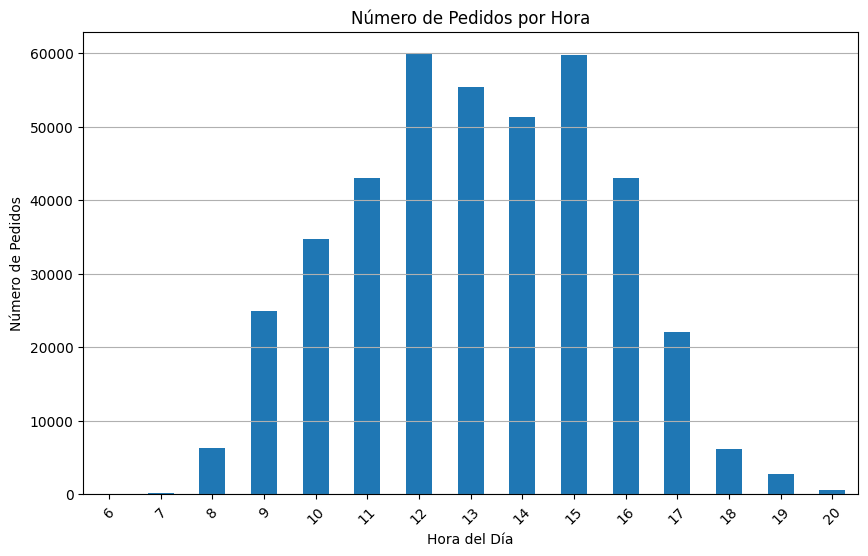

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer la hora de cada pedido
df_filtrado['Hora'] = df_filtrado['InvoiceDate'].dt.hour

# Contar el número de pedidos por hora
pedidos_por_hora = df_filtrado.groupby('Hora').size()

plt.figure(figsize=(10, 6))
pedidos_por_hora.plot(kind='bar')
plt.title('Número de Pedidos por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


**Pedidos por Mes**

En el histograma se observa una cantidad de pedidos aproximadamente constantes entre enero y junio. Sin embargo, a partir de julio comienza un incremento constante, alcanzando su punto más alto en noviembre. Esto podría estar relacionado con eventos de ventas especiales como Black Friday, Cyber Monday o preparación para las navidades. Diciembre también muestra una cantidad alta de pedidos, lo que probablemente refleja las compras navideñas.

Los meses con menos actividad parecen ser enero y febrero, posiblemente debido a una menor inclinación a realizar compras después de la temporada navideña.
En general, los datos sugieren una clara estacionalidad en los hábitos de compra, tanto diaria como mensualmente. Esto podría ser útil para la planificación de inventario, campañas de marketing, y para asegurar que la logística y el soporte al cliente estén preparados para los picos de demanda. También podría indicar oportunidades para impulsar las ventas durante los períodos de menor actividad con promociones o descuentos especiales.

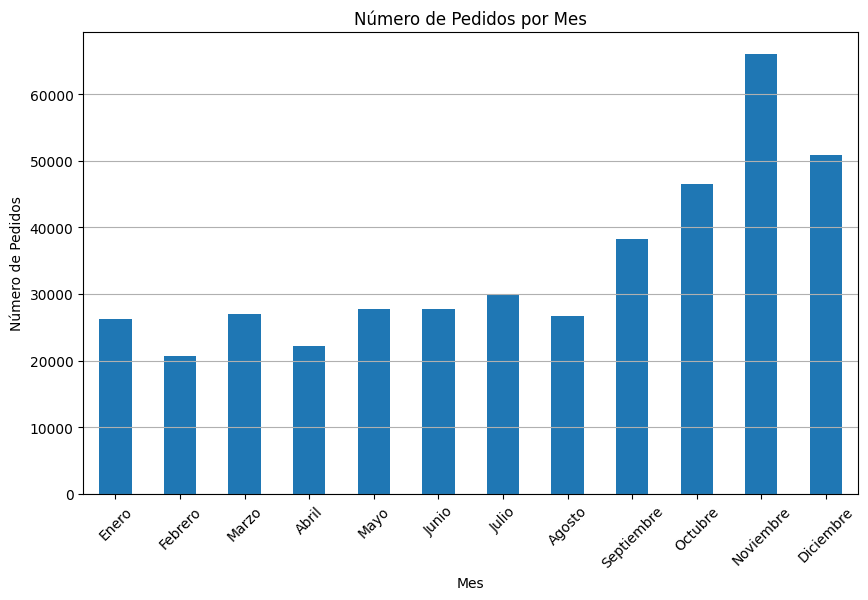

In [73]:
# Extraer el mes de cada pedido
df_filtrado['Mes'] = df_filtrado['InvoiceDate'].dt.month

# Contar el número de pedidos por mes
pedidos_por_mes = df_filtrado.groupby('Mes').size()

plt.figure(figsize=(10, 6))
pedidos_por_mes.plot(kind='bar')
plt.title('Número de Pedidos por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Pedidos')
plt.xticks(ticks=range(len(pedidos_por_mes)), labels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45)
plt.grid(axis='y')
plt.show()


# **ANEXOS**

### **Anexo 1: Evaluación de la conversión**

Para confirmar que la eliminación de los códigos de los colores se ha realizado de manera adecuada, se va a proceder a calcular la intersección de las palabras de las descripciones de cada uno de los nuevos stockcodes. Esta intersección será el nombre específico del producto acumulado. Si la conversión ha sido realizada de manera correcta, este nombre existirá y tendrá sentido; si no, el nombre será vacío o una cadena sin significado explícito como 'OR' o 'AND', que son palabras comunes. Para realizar este proceso de evaluación se empleará la siguiente función:

In [74]:
import re

def clean_text(text):
    # Remover caracteres especiales y convertir a minúsculas
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.upper()
    return text

def interseccion_descripciones_por_stockcode(df):
    result_dict = {}

    # Itera sobre cada fila del DataFrame
    for index, row in df.iterrows():
        stock_code = row['StockCode']
        description = row['Description']

        # Limpiar y normalizar la descripción
        description = clean_text(description)

        # Si el StockCode no está en el diccionario de resultados, inicializa la intersección como None
        if stock_code not in result_dict:
            result_dict[stock_code] = set(description.split())
        else:
            result_dict[stock_code] = result_dict[stock_code].intersection(set(description.split()))

    # Crea un DataFrame a partir del diccionario de resultados
    result_df = pd.DataFrame(columns=['StockCode', 'Description_Intersect'])
    for stock_code, intersection in result_dict.items():
        result_df = result_df.append({'StockCode': stock_code, 'Description_Intersect': ' '.join(intersection)}, ignore_index=True)

    return result_df

Se aplica la función sobre los datos

In [75]:
nombre_productos = interseccion_descripciones_por_stockcode(df_filtrado)

Las cadenas sin sentido son palabras o conjuntos de palabras cortos, por ello se imprimen los valores de longitud menor de 10 para evaluar su adecuación.

In [76]:
nombre_productos[nombre_productos['Description_Intersect'].str.len() <=10].sort_values(by='StockCode')

,StockCode,Description_Intersect
899,17084,INCENSE
762,20622,COVER
1169,21025,FROG SPACE
1171,21026,SPACE OWL
598,21888,BINGO SET
625,22174,PHOTO CUBE
443,22653,BOX BUTTON
1960,23028,BLUE GLAZE
1961,23031,GLAZE PINK
1982,23196,MAGNETIC


Se aprecia que todas las cadenas de palabras cortas son productos con sentido, por lo que han sido convertidos de manera correcta. Sin embargo, existen ciertos productos con string vacío; estos productos parecen haber sido convertidos de manera incorrecta. A continuación se imprimen estos códigos para su análisis particular.

In [77]:
nombre_productos[nombre_productos['Description_Intersect'].str.len() == 0].sort_values(by='StockCode')

,StockCode,Description_Intersect
3,84029,
1300,84247,
575,85071,


In [78]:
codigos_extra = nombre_productos[nombre_productos['Description_Intersect'].str.len() == 0]['StockCode'].values
print(codigos_extra)

[84029 85071 84247]


Se imprimen los datos del primer stockcode incorrecto

In [79]:
dos_productos = df_filtrado[df_filtrado['StockCode'] == codigos_extra[0]]
dos_productos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hora,Mes
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,8,12
61,536373,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:02:00,3.39,17850,United Kingdom,9,12
78,536375,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 09:32:00,3.39,17850,United Kingdom,9,12
291,536396,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 10:51:00,3.39,17850,United Kingdom,10,12
428,536406,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 11:33:00,3.39,17850,United Kingdom,11,12
...,...,...,...,...,...,...,...,...,...,...
540170,581469,84029,RED WOOLLY HOTTIE WHITE HEART.,1,2011-12-08 19:28:00,4.25,14606,United Kingdom,19,12
540393,581480,84029,RED WOOLLY HOTTIE WHITE HEART.,8,2011-12-09 09:07:00,4.25,14441,United Kingdom,9,12
541320,581497,84029,KNITTED UNION FLAG HOT WATER BOTTLE,11,2011-12-09 10:23:00,8.29,15287,United Kingdom,10,12
541520,581498,84029,RED WOOLLY HOTTIE WHITE HEART.,4,2011-12-09 10:26:00,8.29,15287,United Kingdom,10,12


Se puede ver que el producto asociado a este stockcode tiene varias analogias refertentes al mismo concepto. "HOT WATER BOTTLE" y "HOTTIE" son palabras completamente distintas pero una se trata de la abreviatura de la otra. Por lo que el agrupamiento se realizó de manera correcta.

Se procedera al análisis del siguiente stockcode sin descripción común.

In [80]:
df_filtrado[df_filtrado['StockCode'] == codigos_extra[1]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hora,Mes
1405,536540,85071,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911,EIRE,14,12
3220,536611,85071,CHARLIE+LOLA MY ROOM DOOR SIGN,6,2010-12-02 09:43:00,2.55,15752,United Kingdom,9,12
25310,538367,85071,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,1,2010-12-12 10:48:00,2.95,14800,United Kingdom,10,12
40379,539736,85071,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,2010-12-21 15:18:00,5.06,15287,United Kingdom,15,12
41869,539958,85071,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,7,2010-12-23 13:26:00,0.85,15287,United Kingdom,13,12
...,...,...,...,...,...,...,...,...,...,...
528064,580727,85071,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,2011-12-05 17:17:00,4.96,14096,United Kingdom,17,12
530626,580876,85071,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,2011-12-06 12:12:00,0.39,14071,United Kingdom,12,12
531008,580893,85071,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,2011-12-06 12:38:00,0.39,17290,United Kingdom,12,12
540152,581469,85071,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",1,2011-12-08 19:28:00,0.39,14606,United Kingdom,19,12


Aparentemente, el error cometido no está relacionado con la conversión del stockcode, sino con la función de evaluación. Esta función detecta palabras comunes, las cuales no existen en esta clase de producto. Sin embargo, parece ser el mismo producto. Con los casos expuestos, el producto parece ser una señal de diferentes tipos o estilos. La función de evaluación da su error debido a que no es capaz de captar como iguales las palabras "DOORSIGN" y "SIGN". De esta manera, se confirmará si la cadena "SIGN" forma parte de todos estos productos.

In [81]:
df_filtrado[df_filtrado['StockCode'] == codigos_extra[1]]['Description'].str.contains('SIGN').all()

True

Efectivamente se encuentra en todos los productos, por lo que este StockCode estaría relacionado con un único producto, las señales, por lo que la conversión se realizó de manera adecuada.

A continuación se analizará el tercer y último stockcode clasificado como incorrecto.

In [82]:
df_filtrado[df_filtrado['StockCode'] == codigos_extra[2]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Hora,Mes
6437,536945,84247,PACK/12 BLUE FOLKART CARDS,1,2010-12-03 12:24:00,2.95,14083,United Kingdom,12,12
7336,537034,84247,"DECOUPAGE,GREETING CARD,",12,2010-12-03 17:20:00,0.42,13081,United Kingdom,17,12
9340,537199,84247,"DECOUPAGE,GREETING CARD,",12,2010-12-05 14:06:00,0.42,15894,United Kingdom,14,12
16248,537646,84247,PACK/12 XMAS FUN CARD,1,2010-12-07 15:39:00,2.95,17591,United Kingdom,15,12
17086,537679,84247,PACK/12 XMAS FUN CARD,1,2010-12-08 10:05:00,2.95,15287,United Kingdom,10,12
...,...,...,...,...,...,...,...,...,...,...
501689,578827,84247,PACK OF 12 CHRISTMAS FUN CARDS,1,2011-11-25 14:25:00,2.46,15287,United Kingdom,14,11
502645,578844,84247,PACK OF 12 CHRISTMAS FUN CARDS,3,2011-11-25 16:14:00,2.46,15287,United Kingdom,16,11
505119,579001,84247,PACK/12 BLUE FOLKART CARDS,1,2011-11-27 16:19:00,2.95,15555,United Kingdom,16,11
511943,579508,84247,PACK OF 12 CHRISTMAS FUN CARDS,1,2011-11-29 16:33:00,2.46,15287,United Kingdom,16,11


De la misma forma que con las señales, el error clasificado parece deberse a la diferencia de palabras usadas, en este caso entre "CARD" y "CARDS". Este stockcode parece asociado a la venta de barajas de cartas, por lo que se va a confirmar si la palabra "CARD" pertenece a todos los productos con este código.

In [83]:
df_filtrado[df_filtrado['StockCode'] == codigos_extra[2]]['Description'].str.contains('CARD').all()

True

De nuevo, la palabra pertenece a todos los productos, por lo que el proceso se realizó de manera correcta y no hace falta aplicar ningún tipo de corrección.

Se añaden los nuevos nombres de productos al conjunto total y se cambian las descripciones de los stockcodes

In [84]:
for i, j in zip(codigos_extra, ['HOTTIE', 'SIGN', 'CARDS']):
  nombre_productos.loc[nombre_productos['StockCode'] == i, 'Description_Intersect'] = j.upper()

### **Anexo 2: letras C y A en InvoiceNo**

En este anexo se muestra aquellos registros de productos cuyo identificador ``InvoiceNo`` comienza por la letra A o C.

Como se había explicado previamente, aquellos identificadores que comienzan por la letra C representan **cancelaciones de productos**. Es por esta razón que el valor de la cantidad comprada de todos ellos es negativa.

Por otro lado, aquellos valores numéricos de ``InvoiceNo`` que comienzan con la letra A indican una **deuda mala**, reflejado en un UnitPrice de valor negativo.

In [85]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
filasC = df[df['InvoiceNo'].str.startswith(('C'))]
filasC

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [86]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
filasA = df[df['InvoiceNo'].str.startswith(('A'))]
filasA

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,15287,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,15287,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,15287,United Kingdom
